In [1]:
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import operator
from utils import buildNetwork, load_cifar
#import urllib.request

In [2]:
# Let's start a Session
sess = tf.Session()

In [3]:
batch_size = 1
HEIGHT = 32
WIDTH = 32
CHANNELS = 3
NUM_CLASSES = 10

In [4]:
data_path = "data/CIFAR-10/"

train_samples, train_labels, val_samples, val_labels = load_cifar(data_path)

In [5]:
# TODO add placeholder for inputs
inputs = tf.placeholder(tf.float32,name='input',shape=[batch_size,WIDTH,HEIGHT,CHANNELS])

logits = buildNetwork(inputs, batch_size)

## Task: Restore the previously stored checkpoint

In [6]:
# TODO restore the saved checkpoints ./checkpoints/model.ckpt
saver = tf.train.Saver()
saver.restore(sess, "./checkpoints/model.ckpt")

INFO:tensorflow:Restoring parameters from ./checkpoints/model.ckpt


## Task: Transform logits to probabilities

In [7]:
# TODO add an appropriate op to convert the logits into probabilities
probs = tf.nn.softmax(logits)

## Task:  Inference. Display results

[[  4.66834579e-04   1.23057363e-03   1.54186385e-02   5.62599838e-01
    1.98274455e-03   3.14079225e-01   5.70582971e-02   2.31663696e-03
    3.38698775e-02   1.09771788e-02]]
0.999999844411
[[  9.02947877e-03   1.58332556e-01   2.06380530e-04   8.00134556e-04
    2.48978868e-05   3.11638541e-05   1.02902716e-03   1.36297228e-06
    8.06539357e-01   2.40056161e-02]]
0.999999975003
[[ 0.12267016  0.12516341  0.00692651  0.02042314  0.00330578  0.00570425
   0.00308591  0.00462619  0.33421648  0.37387827]]
1.00000007055
[[  2.85700411e-01   6.27724901e-02   1.49192251e-02   2.48424406e-03
    1.66882109e-03   1.77921029e-04   3.69051215e-03   6.36677069e-05
    6.19223297e-01   9.29937046e-03]]
0.999999958956
[[  7.51319249e-06   6.38204627e-04   2.74654268e-03   5.41636441e-03
    4.29751026e-03   3.63302301e-04   9.86478508e-01   2.83284771e-06
    4.56538801e-05   3.58259877e-06]]
1.00000001431


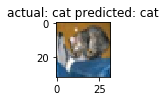

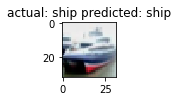

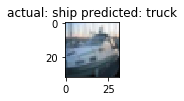

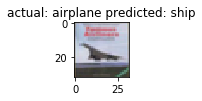

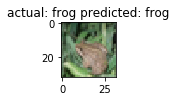

In [10]:
label_to_name = ['airplane', 'automobile', 'bird', 'cat', 'deer' , 'dog', 'frog', 'horse', 'ship', 'truck']

# TODO plot the first five *validation* images 
for index in range(5):
    feed_dict = {inputs: [val_samples[index]]}
    classification = sess.run(probs, feed_dict)
    print(classification)
    print(sum(classification[0]))
    idx = max(enumerate(classification[0]), key=operator.itemgetter(1))[0]
    plt.figure(figsize=(1,1))
    plt.title('actual: '+label_to_name[val_labels[index]]+' predicted: '+ label_to_name[idx])
    plt.imshow(val_samples[index])

In [11]:
# TODO for each image, print the predicted class and the probability vector for all classes

for index in range(val_samples.shape[0]):
    feed_dict = {inputs: [val_samples[index]]}
    classification = sess.run(probs, feed_dict)
    idx = max(enumerate(classification[0]), key=operator.itemgetter(1))[0]
    #plt.figure(figsize=(1,1))
    print('actual: '+label_to_name[val_labels[index]]+' predicted: '+ label_to_name[idx])
    for i in range(10):
        print (label_to_name[i]+': '+str(classification[0][i]))
    print('--------------')

actual: cat predicted: cat
airplane: 0.000466835
automobile: 0.00123057
bird: 0.0154186
cat: 0.5626
deer: 0.00198274
dog: 0.314079
frog: 0.0570583
horse: 0.00231664
ship: 0.0338699
truck: 0.0109772
--------------
actual: ship predicted: ship
airplane: 0.00902948
automobile: 0.158333
bird: 0.000206381
cat: 0.000800135
deer: 2.48979e-05
dog: 3.11639e-05
frog: 0.00102903
horse: 1.36297e-06
ship: 0.806539
truck: 0.0240056
--------------
actual: ship predicted: truck
airplane: 0.12267
automobile: 0.125163
bird: 0.00692651
cat: 0.0204231
deer: 0.00330578
dog: 0.00570425
frog: 0.00308591
horse: 0.00462619
ship: 0.334216
truck: 0.373878
--------------
actual: airplane predicted: ship
airplane: 0.2857
automobile: 0.0627725
bird: 0.0149192
cat: 0.00248424
deer: 0.00166882
dog: 0.000177921
frog: 0.00369051
horse: 6.36677e-05
ship: 0.619223
truck: 0.00929937
--------------
actual: frog predicted: frog
airplane: 7.51319e-06
automobile: 0.000638205
bird: 0.00274654
cat: 0.00541636
deer: 0.00429751
d

ship: 0.00755185
truck: 0.545804
--------------
actual: ship predicted: airplane
airplane: 0.27097
automobile: 0.121278
bird: 0.0499403
cat: 0.0545615
deer: 0.0237427
dog: 0.0131502
frog: 0.0180015
horse: 0.0108578
ship: 0.266586
truck: 0.170913
--------------
actual: airplane predicted: bird
airplane: 0.126241
automobile: 0.00232606
bird: 0.498192
cat: 0.0636703
deer: 0.21558
dog: 0.0242431
frog: 0.0309932
horse: 0.0294182
ship: 0.00645214
truck: 0.00288409
--------------
actual: cat predicted: cat
airplane: 0.000669315
automobile: 0.00118768
bird: 0.0240164
cat: 0.479253
deer: 0.019115
dog: 0.372413
frog: 0.0609653
horse: 0.0279188
ship: 0.00210648
truck: 0.0123556
--------------
actual: ship predicted: ship
airplane: 0.0122056
automobile: 0.00117603
bird: 0.000185534
cat: 0.000155363
deer: 1.46609e-06
dog: 9.96833e-06
frog: 1.23949e-05
horse: 3.20072e-07
ship: 0.98435
truck: 0.00190306
--------------
actual: ship predicted: ship
airplane: 0.0974482
automobile: 0.00645237
bird: 0.025

actual: automobile predicted: automobile
airplane: 0.000276646
automobile: 0.954188
bird: 1.29916e-06
cat: 2.55518e-05
deer: 3.70029e-05
dog: 8.12295e-07
frog: 0.000268251
horse: 2.98026e-06
ship: 0.000479231
truck: 0.0447207
--------------
actual: automobile predicted: automobile
airplane: 0.00161687
automobile: 0.945111
bird: 2.70936e-05
cat: 0.000233846
deer: 0.000175653
dog: 9.08629e-06
frog: 0.00213169
horse: 9.49697e-06
ship: 0.00651671
truck: 0.0441689
--------------
actual: cat predicted: ship
airplane: 0.193554
automobile: 0.00205382
bird: 0.260866
cat: 0.126833
deer: 0.0101299
dog: 0.0443665
frog: 0.00669799
horse: 0.00599946
ship: 0.334887
truck: 0.0146128
--------------
actual: frog predicted: frog
airplane: 9.4039e-05
automobile: 0.00373359
bird: 0.00938947
cat: 0.0281247
deer: 0.0187265
dog: 0.00366099
frog: 0.935739
horse: 0.000110481
ship: 0.000297639
truck: 0.000123422
--------------
actual: ship predicted: cat
airplane: 0.00646618
automobile: 0.0179045
bird: 0.0469274

actual: dog predicted: bird
airplane: 0.00735881
automobile: 0.00029316
bird: 0.350766
cat: 0.308675
deer: 0.0277238
dog: 0.222987
frog: 0.0561738
horse: 0.00768747
ship: 0.0171772
truck: 0.00115717
--------------
actual: deer predicted: deer
airplane: 0.0422316
automobile: 0.00023628
bird: 0.173506
cat: 0.00756873
deer: 0.59132
dog: 0.00585791
frog: 0.0033732
horse: 0.175396
ship: 3.62267e-05
truck: 0.000473793
--------------
actual: bird predicted: bird
airplane: 0.0821673
automobile: 0.00108385
bird: 0.395448
cat: 0.22092
deer: 0.0216449
dog: 0.123543
frog: 0.0151638
horse: 0.0137975
ship: 0.118194
truck: 0.00803729
--------------
actual: automobile predicted: automobile
airplane: 0.00038842
automobile: 0.978611
bird: 4.52267e-06
cat: 3.97939e-05
deer: 0.000155469
dog: 1.27222e-06
frog: 0.00107709
horse: 5.56562e-06
ship: 0.000340627
truck: 0.0193757
--------------
actual: frog predicted: cat
airplane: 0.00676479
automobile: 0.0765576
bird: 0.0284761
cat: 0.27852
deer: 0.107352
dog:

automobile: 1.97262e-07
bird: 0.000379609
cat: 0.000346031
deer: 0.00910303
dog: 0.00246485
frog: 8.96643e-07
horse: 0.98744
ship: 7.89315e-09
truck: 0.000158393
--------------
actual: truck predicted: truck
airplane: 0.00293652
automobile: 0.0498416
bird: 2.81038e-05
cat: 0.00100923
deer: 0.000281394
dog: 0.000391837
frog: 4.67736e-05
horse: 0.00519857
ship: 0.00118883
truck: 0.939077
--------------
actual: horse predicted: cat
airplane: 0.00177832
automobile: 0.00177588
bird: 0.10226
cat: 0.265307
deer: 0.184115
dog: 0.156084
frog: 0.258321
horse: 0.0274089
ship: 0.000669714
truck: 0.00228016
--------------
actual: deer predicted: truck
airplane: 0.070864
automobile: 0.0389515
bird: 0.0452642
cat: 0.211062
deer: 0.0277587
dog: 0.112792
frog: 0.0188976
horse: 0.0636579
ship: 0.100532
truck: 0.31022
--------------
actual: dog predicted: cat
airplane: 0.00710117
automobile: 0.0012429
bird: 0.0646353
cat: 0.44852
deer: 0.0147074
dog: 0.361943
frog: 0.0179679
horse: 0.0372862
ship: 0.0198

bird: 0.0259019
cat: 0.0205658
deer: 0.000453801
dog: 0.00367059
frog: 0.00339603
horse: 8.79496e-05
ship: 0.905929
truck: 0.00388511
--------------
actual: bird predicted: cat
airplane: 0.0181194
automobile: 0.00454861
bird: 0.0903975
cat: 0.358489
deer: 0.0246336
dog: 0.326345
frog: 0.0329049
horse: 0.0454856
ship: 0.0582017
truck: 0.0408751
--------------
actual: deer predicted: deer
airplane: 0.0027576
automobile: 0.00178856
bird: 0.0226097
cat: 0.00925279
deer: 0.813764
dog: 0.00575155
frog: 0.0263938
horse: 0.116728
ship: 5.69653e-06
truck: 0.000947869
--------------
actual: horse predicted: horse
airplane: 0.000528263
automobile: 1.24437e-05
bird: 0.00187753
cat: 0.00997853
deer: 0.0123927
dog: 0.0404544
frog: 4.46795e-05
horse: 0.929413
ship: 3.02461e-06
truck: 0.00529543
--------------
actual: airplane predicted: bird
airplane: 0.102016
automobile: 0.00199013
bird: 0.43025
cat: 0.152128
deer: 0.106108
dog: 0.0987004
frog: 0.0226587
horse: 0.0566352
ship: 0.0208665
truck: 0.008

actual: deer predicted: horse
airplane: 0.0206545
automobile: 0.00291847
bird: 0.0722247
cat: 0.109588
deer: 0.188111
dog: 0.132686
frog: 0.0141184
horse: 0.432295
ship: 0.0011732
truck: 0.0262316
--------------
actual: airplane predicted: bird
airplane: 0.0693873
automobile: 0.00135931
bird: 0.423896
cat: 0.193142
deer: 0.0954317
dog: 0.118466
frog: 0.0238724
horse: 0.0511109
ship: 0.0160447
truck: 0.00728924
--------------
actual: horse predicted: horse
airplane: 0.00585435
automobile: 4.97852e-05
bird: 0.0247245
cat: 0.0187246
deer: 0.0658862
dog: 0.0623615
frog: 0.000331873
horse: 0.818322
ship: 3.41373e-05
truck: 0.00371147
--------------
actual: horse predicted: horse
airplane: 0.000446675
automobile: 1.06136e-05
bird: 0.00181583
cat: 0.00314351
deer: 0.0450956
dog: 0.00930916
frog: 5.34075e-05
horse: 0.938847
ship: 2.3552e-07
truck: 0.00127797
--------------
actual: dog predicted: dog
airplane: 0.000162454
automobile: 2.80343e-05
bird: 0.0216705
cat: 0.273589
deer: 0.0227517
dog

actual: deer predicted: bird
airplane: 0.11031
automobile: 0.000637526
bird: 0.392062
cat: 0.0693786
deer: 0.191062
dog: 0.0591672
frog: 0.00657462
horse: 0.163358
ship: 0.00258639
truck: 0.00486367
--------------
actual: automobile predicted: airplane
airplane: 0.424258
automobile: 0.0473752
bird: 0.149735
cat: 0.0506115
deer: 0.150772
dog: 0.0143045
frog: 0.0215235
horse: 0.047222
ship: 0.0324338
truck: 0.0617643
--------------
actual: cat predicted: truck
airplane: 0.031297
automobile: 0.176335
bird: 0.0245326
cat: 0.167072
deer: 0.0406389
dog: 0.0705661
frog: 0.082317
horse: 0.0351105
ship: 0.0691699
truck: 0.302961
--------------
actual: ship predicted: ship
airplane: 0.24171
automobile: 0.0112509
bird: 0.155514
cat: 0.0576589
deer: 0.0119663
dog: 0.0141727
frog: 0.0138132
horse: 0.00269395
ship: 0.474454
truck: 0.0167655
--------------
actual: automobile predicted: automobile
airplane: 0.00392875
automobile: 0.898931
bird: 0.000286682
cat: 0.00150978
deer: 0.000553983
dog: 6.8512

actual: dog predicted: horse
airplane: 0.001443
automobile: 5.626e-05
bird: 0.0592947
cat: 0.0583121
deer: 0.340508
dog: 0.139264
frog: 0.00639746
horse: 0.393882
ship: 1.09701e-05
truck: 0.000831718
--------------
actual: airplane predicted: ship
airplane: 0.223146
automobile: 0.0542272
bird: 0.0172874
cat: 0.00222988
deer: 0.00145318
dog: 0.000125915
frog: 0.00584938
horse: 2.60929e-05
ship: 0.691365
truck: 0.00429019
--------------
actual: airplane predicted: bird
airplane: 0.251255
automobile: 0.00243635
bird: 0.427081
cat: 0.096956
deer: 0.0850491
dog: 0.0436938
frog: 0.0109402
horse: 0.0404786
ship: 0.0309164
truck: 0.0111933
--------------
actual: bird predicted: bird
airplane: 0.00283579
automobile: 4.39652e-05
bird: 0.630202
cat: 0.0997485
deer: 0.116459
dog: 0.0632759
frog: 0.0833661
horse: 0.00347506
ship: 0.000552641
truck: 4.11861e-05
--------------
actual: truck predicted: truck
airplane: 0.0114978
automobile: 0.0329352
bird: 0.0012848
cat: 0.0337801
deer: 0.00154057
dog:

bird: 0.0997157
cat: 0.323998
deer: 0.00976711
dog: 0.544204
frog: 0.0125056
horse: 0.00816828
ship: 0.000943694
truck: 0.00029681
--------------
actual: deer predicted: bird
airplane: 0.0680587
automobile: 0.00877007
bird: 0.323914
cat: 0.100316
deer: 0.311008
dog: 0.0349527
frog: 0.105876
horse: 0.0347179
ship: 0.00627965
truck: 0.00610638
--------------
actual: ship predicted: truck
airplane: 0.00310561
automobile: 0.224195
bird: 0.000413864
cat: 0.0207561
deer: 0.00154546
dog: 0.00517762
frog: 0.00536629
horse: 0.00384614
ship: 0.0152878
truck: 0.720307
--------------
actual: frog predicted: frog
airplane: 0.000823802
automobile: 0.0255233
bird: 0.0171914
cat: 0.0544721
deer: 0.0825149
dog: 0.00854655
frog: 0.806701
horse: 0.00164793
ship: 0.000614145
truck: 0.00196531
--------------
actual: ship predicted: ship
airplane: 0.125698
automobile: 0.00547191
bird: 0.0201353
cat: 0.00569819
deer: 0.000660772
dog: 0.00104915
frog: 0.0013534
horse: 0.000131162
ship: 0.834172
truck: 0.00563

airplane: 0.0010423
automobile: 2.19778e-05
bird: 0.0392443
cat: 0.288513
deer: 0.00201488
dog: 0.638645
frog: 0.00185789
horse: 0.0193509
ship: 0.00613553
truck: 0.00317376
--------------
actual: frog predicted: frog
airplane: 3.379e-05
automobile: 0.00293499
bird: 0.00344318
cat: 0.00438969
deer: 0.00415365
dog: 0.000206754
frog: 0.984598
horse: 2.57901e-06
ship: 0.000226421
truck: 1.06123e-05
--------------
actual: frog predicted: frog
airplane: 0.000468109
automobile: 0.00263119
bird: 0.0410654
cat: 0.0767133
deer: 0.224754
dog: 0.0266349
frog: 0.621854
horse: 0.00532118
ship: 0.000105202
truck: 0.000452068
--------------
actual: frog predicted: frog
airplane: 8.95044e-05
automobile: 0.0045866
bird: 0.00585522
cat: 0.00300252
deer: 0.0341257
dog: 0.000205296
frog: 0.952059
horse: 2.51927e-05
ship: 3.54432e-05
truck: 1.52464e-05
--------------
actual: bird predicted: bird
airplane: 0.00401492
automobile: 0.000606001
bird: 0.357145
cat: 0.236342
deer: 0.0468829
dog: 0.077916
frog: 0.

bird: 0.0331256
cat: 0.0674078
deer: 0.189409
dog: 0.021536
frog: 0.676362
horse: 0.00483782
ship: 0.000196753
truck: 0.000771661
--------------
actual: automobile predicted: automobile
airplane: 0.015925
automobile: 0.718349
bird: 0.000750082
cat: 0.00306305
deer: 0.015346
dog: 0.000492845
frog: 0.00756127
horse: 0.00598194
ship: 0.00218426
truck: 0.230347
--------------
actual: deer predicted: airplane
airplane: 0.599176
automobile: 0.00570662
bird: 0.0732041
cat: 0.00651467
deer: 0.159236
dog: 0.00266117
frog: 0.000967389
horse: 0.129643
ship: 0.00163918
truck: 0.0212518
--------------
actual: horse predicted: truck
airplane: 0.0502982
automobile: 0.0128336
bird: 0.00608031
cat: 0.0328223
deer: 0.0163701
dog: 0.0296367
frog: 0.000646729
horse: 0.285636
ship: 0.00500954
truck: 0.560667
--------------
actual: cat predicted: dog
airplane: 0.00619977
automobile: 0.000371201
bird: 0.136796
cat: 0.314729
deer: 0.0726429
dog: 0.324255
frog: 0.0194817
horse: 0.117639
ship: 0.00155532
truck:

truck: 0.00103589
--------------
actual: dog predicted: horse
airplane: 0.00245386
automobile: 7.86126e-06
bird: 0.0382165
cat: 0.0231236
deer: 0.0808143
dog: 0.101237
frog: 0.000285965
horse: 0.752948
ship: 8.90174e-06
truck: 0.00090376
--------------
actual: cat predicted: dog
airplane: 0.000601613
automobile: 3.54013e-05
bird: 0.0832808
cat: 0.346277
deer: 0.0162993
dog: 0.518002
frog: 0.016656
horse: 0.0170775
ship: 0.000968
truck: 0.000802581
--------------
actual: truck predicted: truck
airplane: 0.017193
automobile: 0.427576
bird: 0.00262274
cat: 0.0204264
deer: 0.0294845
dog: 0.00560855
frog: 0.0188597
horse: 0.0267693
ship: 0.00517051
truck: 0.44629
--------------
actual: dog predicted: cat
airplane: 0.00134928
automobile: 0.0136984
bird: 0.00468056
cat: 0.421223
deer: 0.00328105
dog: 0.227894
frog: 0.023389
horse: 0.0160436
ship: 0.0243045
truck: 0.264136
--------------
actual: frog predicted: deer
airplane: 0.0118405
automobile: 0.0246037
bird: 0.0644914
cat: 0.0684306
deer:

actual: ship predicted: ship
airplane: 0.0157411
automobile: 0.0176076
bird: 0.010793
cat: 0.0910027
deer: 0.000927899
dog: 0.0278325
frog: 0.00912999
horse: 0.00100413
ship: 0.746855
truck: 0.0791065
--------------
actual: horse predicted: horse
airplane: 0.0045759
automobile: 5.45933e-05
bird: 0.0114243
cat: 0.0108686
deer: 0.0498951
dog: 0.0326203
frog: 0.000179376
horse: 0.885748
ship: 1.71232e-05
truck: 0.00461706
--------------
actual: deer predicted: deer
airplane: 0.00387615
automobile: 0.000309008
bird: 0.249681
cat: 0.0578612
deer: 0.518378
dog: 0.0501416
frog: 0.0920835
horse: 0.0273329
ship: 0.000123786
truck: 0.000212818
--------------
actual: bird predicted: airplane
airplane: 0.847453
automobile: 0.000812127
bird: 0.0861898
cat: 0.0030878
deer: 0.0267167
dog: 0.00127925
frog: 0.000175756
horse: 0.023371
ship: 0.00561733
truck: 0.00529705
--------------
actual: truck predicted: truck
airplane: 0.0321375
automobile: 0.0180994
bird: 0.0286157
cat: 0.173813
deer: 0.0450245
d

truck: 0.000157534
--------------
actual: frog predicted: frog
airplane: 0.0033509
automobile: 0.121126
bird: 0.0186706
cat: 0.0948955
deer: 0.0967226
dog: 0.0226991
frog: 0.60885
horse: 0.00804007
ship: 0.00368555
truck: 0.0219601
--------------
actual: airplane predicted: airplane
airplane: 0.426646
automobile: 0.00156652
bird: 0.337943
cat: 0.0404658
deer: 0.09236
dog: 0.0183085
frog: 0.00321001
horse: 0.0572138
ship: 0.0126648
truck: 0.00962138
--------------
actual: automobile predicted: automobile
airplane: 0.00111768
automobile: 0.572482
bird: 5.66207e-06
cat: 0.000195866
deer: 0.000153001
dog: 1.7409e-05
frog: 0.000179687
horse: 0.000165798
ship: 0.000766534
truck: 0.424916
--------------
actual: bird predicted: bird
airplane: 0.0156241
automobile: 1.10128e-05
bird: 0.791559
cat: 0.00873153
deer: 0.165634
dog: 0.00644087
frog: 0.00564703
horse: 0.00624912
ship: 9.22392e-05
truck: 1.07334e-05
--------------
actual: horse predicted: bird
airplane: 0.0225659
automobile: 0.00090221

ship: 0.00244504
truck: 0.826696
--------------
actual: dog predicted: dog
airplane: 0.00300984
automobile: 0.00161522
bird: 0.0498387
cat: 0.406953
deer: 0.0189828
dog: 0.415872
frog: 0.0414797
horse: 0.0334974
ship: 0.0121907
truck: 0.016561
--------------
actual: ship predicted: automobile
airplane: 0.0490365
automobile: 0.511799
bird: 0.0029804
cat: 0.00929604
deer: 0.00260117
dog: 0.00108204
frog: 0.0115497
horse: 0.000530826
ship: 0.238988
truck: 0.172137
--------------
actual: cat predicted: frog
airplane: 0.0151425
automobile: 0.212636
bird: 0.0347525
cat: 0.119173
deer: 0.0458323
dog: 0.0182298
frog: 0.462605
horse: 0.00284925
ship: 0.0495528
truck: 0.0392274
--------------
actual: frog predicted: cat
airplane: 0.00426492
automobile: 0.0034643
bird: 0.140997
cat: 0.353106
deer: 0.0303405
dog: 0.131639
frog: 0.302524
horse: 0.00367464
ship: 0.0267519
truck: 0.00323761
--------------
actual: bird predicted: bird
airplane: 0.0105432
automobile: 1.63682e-05
bird: 0.366397
cat: 0.1

actual: bird predicted: bird
airplane: 0.164379
automobile: 0.00027054
bird: 0.420664
cat: 0.0473469
deer: 0.00408577
dog: 0.0187396
frog: 0.00292418
horse: 0.00119967
ship: 0.339077
truck: 0.00131262
--------------
actual: cat predicted: cat
airplane: 0.000533487
automobile: 0.000334929
bird: 0.0159411
cat: 0.486914
deer: 0.00205216
dog: 0.447303
frog: 0.0150119
horse: 0.00699069
ship: 0.0141856
truck: 0.0107333
--------------
actual: ship predicted: ship
airplane: 0.0102227
automobile: 0.00102919
bird: 0.0136056
cat: 0.037654
deer: 0.000191186
dog: 0.0122243
frog: 0.00220576
horse: 0.000154312
ship: 0.916731
truck: 0.00598166
--------------
actual: deer predicted: deer
airplane: 0.0113869
automobile: 0.000622711
bird: 0.299026
cat: 0.0363756
deer: 0.533058
dog: 0.0205473
frog: 0.0726277
horse: 0.0258554
ship: 0.000208595
truck: 0.000292192
--------------
actual: bird predicted: dog
airplane: 0.000835405
automobile: 2.9678e-06
bird: 0.1285
cat: 0.252805
deer: 0.00479529
dog: 0.594755


bird: 0.203928
cat: 0.0291923
deer: 0.594241
dog: 0.024281
frog: 0.0221111
horse: 0.106757
ship: 0.000128939
truck: 0.000783512
--------------
actual: bird predicted: bird
airplane: 0.00880584
automobile: 2.80304e-05
bird: 0.486866
cat: 0.207464
deer: 0.0173471
dog: 0.250681
frog: 0.00780917
horse: 0.0135226
ship: 0.00696917
truck: 0.000506546
--------------
actual: cat predicted: cat
airplane: 0.0153536
automobile: 0.00108055
bird: 0.143167
cat: 0.302252
deer: 0.0693343
dog: 0.299819
frog: 0.0198577
horse: 0.128131
ship: 0.00547647
truck: 0.0155283
--------------
actual: bird predicted: dog
airplane: 0.000969098
automobile: 0.000139792
bird: 0.0518158
cat: 0.287285
deer: 0.035773
dog: 0.536273
frog: 0.0166424
horse: 0.0673112
ship: 0.000670714
truck: 0.00312021
--------------
actual: horse predicted: horse
airplane: 0.000127839
automobile: 7.93963e-07
bird: 3.59288e-05
cat: 0.000164365
deer: 0.00119108
dog: 0.0008529
frog: 1.05637e-07
horse: 0.995155
ship: 1.90108e-08
truck: 0.0024722

truck: 0.0548242
--------------
actual: bird predicted: dog
airplane: 0.0163743
automobile: 0.000366025
bird: 0.189296
cat: 0.196289
deer: 0.0732992
dog: 0.328858
frog: 0.00963292
horse: 0.175392
ship: 0.00329763
truck: 0.00719387
--------------
actual: airplane predicted: airplane
airplane: 0.628326
automobile: 0.00923649
bird: 0.074407
cat: 0.0133654
deer: 0.00851427
dog: 0.00338507
frog: 0.00162175
horse: 0.00388349
ship: 0.233642
truck: 0.023618
--------------
actual: automobile predicted: automobile
airplane: 0.000160625
automobile: 0.94857
bird: 2.8715e-06
cat: 0.000101858
deer: 6.04894e-05
dog: 4.36581e-06
frog: 0.00113921
horse: 5.76538e-06
ship: 0.000795198
truck: 0.0491593
--------------
actual: dog predicted: dog
airplane: 0.00198995
automobile: 0.000145915
bird: 0.118752
cat: 0.387005
deer: 0.0169267
dog: 0.425924
frog: 0.0259855
horse: 0.016141
ship: 0.005111
truck: 0.00201891
--------------
actual: ship predicted: ship
airplane: 0.0103012
automobile: 0.00181422
bird: 0.00

frog: 0.000470933
horse: 0.091777
ship: 0.000188779
truck: 0.0017485
--------------
actual: bird predicted: bird
airplane: 0.0168889
automobile: 0.000100237
bird: 0.755381
cat: 0.0293254
deer: 0.142597
dog: 0.015686
frog: 0.0347052
horse: 0.00432273
ship: 0.00093984
truck: 5.38505e-05
--------------
actual: automobile predicted: truck
airplane: 0.0590281
automobile: 0.242138
bird: 0.00104921
cat: 0.00517924
deer: 0.000761201
dog: 0.000851777
frog: 0.00108708
horse: 0.000781944
ship: 0.225005
truck: 0.464118
--------------
actual: automobile predicted: automobile
airplane: 0.00520253
automobile: 0.807763
bird: 0.000164437
cat: 0.00142929
deer: 0.00145259
dog: 0.00016683
frog: 0.00415734
horse: 0.000381312
ship: 0.00770635
truck: 0.171576
--------------
actual: deer predicted: deer
airplane: 0.0205005
automobile: 0.172855
bird: 0.00574628
cat: 0.0166045
deer: 0.300925
dog: 0.00527541
frog: 0.0179898
horse: 0.255652
ship: 0.000163766
truck: 0.204286
--------------
actual: cat predicted: h

actual: truck predicted: truck
airplane: 0.00468968
automobile: 0.0377631
bird: 0.000544978
cat: 0.0242502
deer: 0.00132487
dog: 0.0135674
frog: 0.000939202
horse: 0.0189996
ship: 0.0113022
truck: 0.886619
--------------
actual: deer predicted: cat
airplane: 0.002751
automobile: 0.00160562
bird: 0.155481
cat: 0.307945
deer: 0.0825563
dog: 0.167982
frog: 0.265778
horse: 0.0101618
ship: 0.00389666
truck: 0.00184332
--------------
actual: truck predicted: truck
airplane: 0.000962046
automobile: 0.0407342
bird: 7.97292e-06
cat: 0.000626536
deer: 9.49376e-05
dog: 0.00019119
frog: 2.45287e-05
horse: 0.00229233
ship: 0.000572249
truck: 0.954494
--------------
actual: horse predicted: horse
airplane: 0.00705344
automobile: 0.000919537
bird: 0.00123679
cat: 0.00363943
deer: 0.0299453
dog: 0.00519874
frog: 6.96037e-05
horse: 0.887071
ship: 1.31528e-05
truck: 0.0648532
--------------
actual: bird predicted: dog
airplane: 0.00486092
automobile: 2.59296e-05
bird: 0.193472
cat: 0.191925
deer: 0.0246

bird: 0.0616179
cat: 0.0172954
deer: 0.0187375
dog: 0.00543754
frog: 0.00182116
horse: 0.0160519
ship: 0.110885
truck: 0.0675716
--------------
actual: horse predicted: horse
airplane: 0.000304863
automobile: 1.80018e-06
bird: 0.000595461
cat: 0.000395856
deer: 0.0252672
dog: 0.00149252
frog: 4.14097e-06
horse: 0.97162
ship: 2.02187e-08
truck: 0.000318292
--------------
actual: cat predicted: dog
airplane: 0.00084718
automobile: 2.43222e-05
bird: 0.0221908
cat: 0.14447
deer: 0.0212157
dog: 0.474734
frog: 0.00112282
horse: 0.330668
ship: 0.000103162
truck: 0.00462442
--------------
actual: ship predicted: ship
airplane: 0.0126352
automobile: 0.00363158
bird: 0.00664266
cat: 0.0220403
deer: 0.000172309
dog: 0.00510572
frog: 0.00205013
horse: 0.000103051
ship: 0.935101
truck: 0.012518
--------------
actual: airplane predicted: ship
airplane: 0.196446
automobile: 0.0515106
bird: 0.0310097
cat: 0.0147176
deer: 0.00454694
dog: 0.00280799
frog: 0.00878522
horse: 0.000810213
ship: 0.660721
tru

actual: truck predicted: cat
airplane: 0.00536122
automobile: 0.0120503
bird: 0.0574574
cat: 0.309463
deer: 0.16478
dog: 0.168662
frog: 0.163425
horse: 0.0881969
ship: 0.00204765
truck: 0.028557
--------------
actual: truck predicted: truck
airplane: 0.0141842
automobile: 0.0351042
bird: 0.00607325
cat: 0.102852
deer: 0.0144452
dog: 0.0803797
frog: 0.00606924
horse: 0.119361
ship: 0.0133059
truck: 0.608226
--------------
actual: truck predicted: automobile
airplane: 0.00267189
automobile: 0.604707
bird: 7.95531e-05
cat: 0.00190421
deer: 0.000817761
dog: 0.000264686
frog: 0.00215196
horse: 0.000652104
ship: 0.00503465
truck: 0.381716
--------------
actual: ship predicted: ship
airplane: 0.378687
automobile: 0.00247103
bird: 0.173703
cat: 0.0233928
deer: 0.00666619
dog: 0.00816438
frog: 0.00270803
horse: 0.00236817
ship: 0.39526
truck: 0.00657953
--------------
actual: horse predicted: deer
airplane: 0.00124103
automobile: 0.000222098
bird: 0.0513713
cat: 0.0811072
deer: 0.434116
dog: 0.

--------------
actual: ship predicted: cat
airplane: 0.00700254
automobile: 0.0294824
bird: 0.0183276
cat: 0.383418
deer: 0.00505329
dog: 0.150763
frog: 0.0570447
horse: 0.00608301
ship: 0.200992
truck: 0.141833
--------------
actual: cat predicted: dog
airplane: 0.00229489
automobile: 8.74741e-05
bird: 0.0246338
cat: 0.212992
deer: 0.00832073
dog: 0.542335
frog: 0.00132617
horse: 0.189917
ship: 0.00156998
truck: 0.016523
--------------
actual: ship predicted: ship
airplane: 0.00726812
automobile: 0.0113639
bird: 0.00138935
cat: 0.00415589
deer: 4.45434e-05
dog: 0.000367605
frog: 0.00161706
horse: 6.17223e-06
ship: 0.966855
truck: 0.00693247
--------------
actual: truck predicted: truck
airplane: 0.001623
automobile: 0.052737
bird: 1.95427e-05
cat: 0.00165433
deer: 5.59624e-05
dog: 0.000371043
frog: 5.81129e-05
horse: 0.000711632
ship: 0.00687758
truck: 0.935892
--------------
actual: dog predicted: dog
airplane: 0.00970612
automobile: 0.00476742
bird: 0.0469633
cat: 0.282956
deer: 0.0

actual: dog predicted: dog
airplane: 0.00075518
automobile: 0.000375145
bird: 0.0319438
cat: 0.406463
deer: 0.0241615
dog: 0.449724
frog: 0.0275973
horse: 0.0506498
ship: 0.00100591
truck: 0.00732416
--------------
actual: automobile predicted: truck
airplane: 0.00506738
automobile: 0.181504
bird: 0.00050009
cat: 0.0237012
deer: 0.000698552
dog: 0.00392687
frog: 0.00359699
horse: 0.00138154
ship: 0.0521828
truck: 0.727441
--------------
actual: deer predicted: deer
airplane: 0.035154
automobile: 0.00336317
bird: 0.107545
cat: 0.0301063
deer: 0.561884
dog: 0.0208471
frog: 0.0199858
horse: 0.215541
ship: 0.000267524
truck: 0.00530612
--------------
actual: horse predicted: cat
airplane: 0.00282867
automobile: 0.0372873
bird: 0.00807801
cat: 0.333011
deer: 0.0237669
dog: 0.161227
frog: 0.0530821
horse: 0.0640214
ship: 0.00554377
truck: 0.311153
--------------
actual: airplane predicted: airplane
airplane: 0.569745
automobile: 0.00857266
bird: 0.111336
cat: 0.0099152
deer: 0.00870184
dog: 

ship: 0.0055102
truck: 0.00149564
--------------
actual: dog predicted: bird
airplane: 0.00586249
automobile: 9.9897e-05
bird: 0.381315
cat: 0.257219
deer: 0.0413549
dog: 0.264246
frog: 0.0289531
horse: 0.0158132
ship: 0.00442697
truck: 0.00070869
--------------
actual: deer predicted: deer
airplane: 0.00243576
automobile: 0.000108581
bird: 0.0701871
cat: 0.0409403
deer: 0.470963
dog: 0.0837752
frog: 0.00871244
horse: 0.322093
ship: 1.43714e-05
truck: 0.000771002
--------------
actual: horse predicted: horse
airplane: 0.000871112
automobile: 3.71216e-05
bird: 0.00171495
cat: 0.00442549
deer: 0.0303077
dog: 0.0112658
frog: 6.6415e-05
horse: 0.946649
ship: 1.1885e-06
truck: 0.00466125
--------------
actual: frog predicted: deer
airplane: 0.0006835
automobile: 0.000135711
bird: 0.192468
cat: 0.130728
deer: 0.357103
dog: 0.103037
frog: 0.202168
horse: 0.0135046
ship: 6.06299e-05
truck: 0.000112326
--------------
actual: automobile predicted: automobile
airplane: 0.0235171
automobile: 0.697

actual: automobile predicted: truck
airplane: 0.138799
automobile: 0.181224
bird: 0.00305422
cat: 0.00821927
deer: 0.00323589
dog: 0.00199548
frog: 0.00128623
horse: 0.00526917
ship: 0.121803
truck: 0.535114
--------------
actual: ship predicted: ship
airplane: 0.116897
automobile: 0.0372791
bird: 0.0053087
cat: 0.0200551
deer: 0.00115701
dog: 0.00615297
frog: 0.000759404
horse: 0.00400568
ship: 0.417228
truck: 0.391157
--------------
actual: frog predicted: frog
airplane: 0.000387217
automobile: 0.0121918
bird: 0.0132681
cat: 0.0177704
deer: 0.0566003
dog: 0.00214869
frog: 0.896806
horse: 0.000300977
ship: 0.000270187
truck: 0.000256458
--------------
actual: airplane predicted: airplane
airplane: 0.678857
automobile: 0.0392688
bird: 0.015193
cat: 0.00596429
deer: 0.0111271
dog: 0.00179576
frog: 0.000549345
horse: 0.0176367
ship: 0.0583454
truck: 0.171262
--------------
actual: deer predicted: deer
airplane: 0.00603816
automobile: 0.000681107
bird: 0.209364
cat: 0.15066
deer: 0.325694

automobile: 0.00595112
bird: 0.255297
cat: 0.0140067
deer: 0.509643
dog: 0.00330298
frog: 0.0284053
horse: 0.0244065
ship: 0.00099167
truck: 0.00183705
--------------
actual: automobile predicted: automobile
airplane: 0.00302169
automobile: 0.949994
bird: 0.000116365
cat: 0.000490109
deer: 0.000771744
dog: 2.84937e-05
frog: 0.00735081
horse: 2.93549e-05
ship: 0.00799707
truck: 0.0302001
--------------
actual: cat predicted: cat
airplane: 0.000442251
automobile: 0.000392522
bird: 0.0221953
cat: 0.527746
deer: 0.00243022
dog: 0.385319
frog: 0.0356346
horse: 0.00354851
ship: 0.0167306
truck: 0.00556131
--------------
actual: frog predicted: frog
airplane: 0.000182659
automobile: 0.0273929
bird: 0.00393358
cat: 0.00609611
deer: 0.0505198
dog: 0.000507281
frog: 0.910935
horse: 0.000146001
ship: 7.22287e-05
truck: 0.00021441
--------------
actual: horse predicted: horse
airplane: 0.00750216
automobile: 0.000331027
bird: 0.0230977
cat: 0.0221554
deer: 0.158461
dog: 0.0367829
frog: 0.00145152


airplane: 0.0107956
automobile: 0.00438008
bird: 0.227293
cat: 0.217353
deer: 0.171203
dog: 0.0915779
frog: 0.249462
horse: 0.0196106
ship: 0.00486006
truck: 0.00346423
--------------
actual: airplane predicted: automobile
airplane: 0.0275218
automobile: 0.538578
bird: 0.000544738
cat: 0.00226485
deer: 0.00683006
dog: 0.000448727
frog: 0.00207744
horse: 0.00585436
ship: 0.00474694
truck: 0.411133
--------------
actual: automobile predicted: automobile
airplane: 0.0352941
automobile: 0.637551
bird: 0.00520005
cat: 0.0192771
deer: 0.0142607
dog: 0.00275948
frog: 0.0383384
horse: 0.00282737
ship: 0.0500637
truck: 0.194428
--------------
actual: deer predicted: horse
airplane: 0.00706083
automobile: 0.0022837
bird: 0.00782802
cat: 0.0106776
deer: 0.211032
dog: 0.0111288
frog: 0.00198561
horse: 0.729391
ship: 1.69962e-05
truck: 0.0185958
--------------
actual: dog predicted: dog
airplane: 0.00111082
automobile: 1.47566e-05
bird: 0.031015
cat: 0.180875
deer: 0.00796167
dog: 0.61829
frog: 0.0

actual: cat predicted: cat
airplane: 0.00261977
automobile: 0.0214282
bird: 0.0320928
cat: 0.367687
deer: 0.0634091
dog: 0.164226
frog: 0.281767
horse: 0.0266809
ship: 0.00550883
truck: 0.0345796
--------------
actual: truck predicted: truck
airplane: 0.224972
automobile: 0.0512594
bird: 0.0477322
cat: 0.0830618
deer: 0.0185472
dog: 0.0338545
frog: 0.00845835
horse: 0.0288128
ship: 0.241673
truck: 0.261628
--------------
actual: truck predicted: truck
airplane: 0.00138185
automobile: 0.0096048
bird: 7.29155e-05
cat: 0.00694678
deer: 0.000286214
dog: 0.00455718
frog: 7.1029e-05
horse: 0.0172298
ship: 0.00157654
truck: 0.958273
--------------
actual: deer predicted: horse
airplane: 0.00473
automobile: 3.15825e-05
bird: 0.039912
cat: 0.0173468
deer: 0.170863
dog: 0.0398103
frog: 0.000611568
horse: 0.725451
ship: 8.16678e-06
truck: 0.00123517
--------------
actual: truck predicted: truck
airplane: 0.0162823
automobile: 0.0323553
bird: 3.65026e-05
cat: 0.000396454
deer: 0.000220531
dog: 0.0

dog: 0.0005736
frog: 0.000225307
horse: 0.000188297
ship: 0.732209
truck: 0.0122873
--------------
actual: automobile predicted: ship
airplane: 0.00824448
automobile: 0.371954
bird: 0.000533396
cat: 0.00186515
deer: 0.000108921
dog: 5.4127e-05
frog: 0.00899764
horse: 2.13343e-06
ship: 0.590678
truck: 0.0175625
--------------
actual: ship predicted: cat
airplane: 0.00329587
automobile: 0.0200135
bird: 0.0222377
cat: 0.416558
deer: 0.0337427
dog: 0.245384
frog: 0.112076
horse: 0.044848
ship: 0.0100798
truck: 0.0917645
--------------
actual: airplane predicted: airplane
airplane: 0.49006
automobile: 0.0479075
bird: 0.0336812
cat: 0.0134152
deer: 0.00826587
dog: 0.00306019
frog: 0.00294738
horse: 0.00396221
ship: 0.3216
truck: 0.0751007
--------------
actual: ship predicted: airplane
airplane: 0.725838
automobile: 0.0232882
bird: 0.00990206
cat: 0.00328952
deer: 0.0105819
dog: 0.00111486
frog: 0.000181909
horse: 0.0285757
ship: 0.0212582
truck: 0.17597
--------------
actual: frog predicted

dog: 5.99553e-06
frog: 0.00170542
horse: 5.8996e-06
ship: 0.0014283
truck: 0.044106
--------------
actual: airplane predicted: airplane
airplane: 0.71015
automobile: 0.00730609
bird: 0.0218598
cat: 0.00152812
deer: 0.00150747
dog: 0.000177021
frog: 0.000322177
horse: 0.000239942
ship: 0.249974
truck: 0.00693609
--------------
actual: dog predicted: dog
airplane: 0.000257835
automobile: 2.09142e-06
bird: 0.0138192
cat: 0.0856213
deer: 0.00823961
dog: 0.619777
frog: 0.000223423
horse: 0.270745
ship: 2.88741e-05
truck: 0.00128577
--------------
actual: bird predicted: deer
airplane: 0.0471112
automobile: 0.00214275
bird: 0.343269
cat: 0.057565
deer: 0.401071
dog: 0.0334068
frog: 0.048652
horse: 0.0631754
ship: 0.00150003
truck: 0.00210703
--------------
actual: automobile predicted: truck
airplane: 0.00762321
automobile: 0.3405
bird: 0.000288191
cat: 0.00637666
deer: 0.000867741
dog: 0.00110532
frog: 0.0021378
horse: 0.00129266
ship: 0.0290216
truck: 0.610786
--------------
actual: airpla

actual: bird predicted: cat
airplane: 0.00305576
automobile: 0.000301257
bird: 0.22805
cat: 0.288097
deer: 0.105887
dog: 0.264206
frog: 0.0816331
horse: 0.0262958
ship: 0.00138907
truck: 0.00108555
--------------
actual: dog predicted: cat
airplane: 0.00472959
automobile: 0.00888746
bird: 0.0239209
cat: 0.383305
deer: 0.0326861
dog: 0.301039
frog: 0.0382264
horse: 0.0947354
ship: 0.00735999
truck: 0.10511
--------------
actual: ship predicted: ship
airplane: 0.00717047
automobile: 0.00142683
bird: 0.00130569
cat: 0.00285392
deer: 1.73129e-05
dog: 0.000512903
frog: 0.000242806
horse: 8.25584e-06
ship: 0.982614
truck: 0.00384813
--------------
actual: automobile predicted: automobile
airplane: 0.00142749
automobile: 0.539462
bird: 1.76872e-05
cat: 0.000570893
deer: 0.000466014
dog: 6.37441e-05
frog: 0.000545305
horse: 0.000582182
ship: 0.000808021
truck: 0.456057
--------------
actual: dog predicted: horse
airplane: 0.00721345
automobile: 0.00516671
bird: 0.0157507
cat: 0.13528
deer: 0.0

actual: dog predicted: dog
airplane: 0.00418752
automobile: 0.0006869
bird: 0.160345
cat: 0.301766
deer: 0.0922306
dog: 0.322081
frog: 0.0706296
horse: 0.0423229
ship: 0.00266455
truck: 0.00308582
--------------
actual: dog predicted: frog
airplane: 0.0138413
automobile: 0.0197634
bird: 0.129986
cat: 0.299506
deer: 0.0462161
dog: 0.0695878
frog: 0.352738
horse: 0.00423842
ship: 0.052424
truck: 0.0116995
--------------
actual: horse predicted: horse
airplane: 0.0129688
automobile: 0.000372371
bird: 0.00262688
cat: 0.00880533
deer: 0.0130656
dog: 0.0174802
frog: 4.22626e-05
horse: 0.85844
ship: 0.000104704
truck: 0.0860934
--------------
actual: horse predicted: horse
airplane: 0.0120116
automobile: 0.000228136
bird: 0.0134974
cat: 0.00795761
deer: 0.10578
dog: 0.0140511
frog: 0.000319494
horse: 0.839073
ship: 2.21079e-05
truck: 0.00706023
--------------
actual: ship predicted: ship
airplane: 0.00970216
automobile: 0.0010195
bird: 0.00113423
cat: 0.0017929
deer: 1.26984e-05
dog: 0.000305

bird: 0.217954
cat: 0.0817416
deer: 0.0486747
dog: 0.037393
frog: 0.0220761
horse: 0.021295
ship: 0.20996
truck: 0.0337259
--------------
actual: dog predicted: dog
airplane: 0.000897956
automobile: 1.08529e-06
bird: 0.0687338
cat: 0.126432
deer: 0.0051526
dog: 0.708548
frog: 0.000267881
horse: 0.0891625
ship: 0.000248415
truck: 0.000554928
--------------
actual: automobile predicted: automobile
airplane: 0.0207509
automobile: 0.795303
bird: 0.000863574
cat: 0.0026917
deer: 0.00179541
dog: 0.000239764
frog: 0.00936669
horse: 0.000183192
ship: 0.0693665
truck: 0.0994389
--------------
actual: truck predicted: cat
airplane: 0.000534518
automobile: 0.0027736
bird: 0.0322943
cat: 0.472563
deer: 0.0244601
dog: 0.160825
frog: 0.293435
horse: 0.00529986
ship: 0.00263564
truck: 0.00517888
--------------
actual: automobile predicted: automobile
airplane: 0.00307164
automobile: 0.867768
bird: 0.000185697
cat: 0.00205889
deer: 0.00116841
dog: 0.000170086
frog: 0.00985344
horse: 0.000159197
ship: 

cat: 0.506726
deer: 0.0188464
dog: 0.267419
frog: 0.110468
horse: 0.00850387
ship: 0.00894159
truck: 0.00516316
--------------
actual: frog predicted: frog
airplane: 6.05283e-05
automobile: 0.000861232
bird: 0.0117975
cat: 0.00591744
deer: 0.00720787
dog: 0.000307055
frog: 0.973628
horse: 3.73045e-06
ship: 0.00021281
truck: 4.05742e-06
--------------
actual: ship predicted: bird
airplane: 0.0835682
automobile: 0.000308238
bird: 0.296819
cat: 0.105943
deer: 0.0862852
dog: 0.139357
frog: 0.00269199
horse: 0.272019
ship: 0.00380809
truck: 0.00919967
--------------
actual: horse predicted: horse
airplane: 0.00276129
automobile: 0.000411712
bird: 0.00708287
cat: 0.049912
deer: 0.0347059
dog: 0.0988838
frog: 0.000880245
horse: 0.768471
ship: 9.03467e-05
truck: 0.0368005
--------------
actual: frog predicted: frog
airplane: 0.00177385
automobile: 0.00104345
bird: 0.19584
cat: 0.0676234
deer: 0.0372638
dog: 0.0103329
frog: 0.681728
horse: 0.000195767
ship: 0.00413052
truck: 6.87123e-05
-------

automobile: 0.0348159
bird: 0.0062287
cat: 0.000544852
deer: 0.00634408
dog: 9.05803e-05
frog: 0.000162736
horse: 0.00252225
ship: 0.0194173
truck: 0.0358576
--------------
actual: airplane predicted: airplane
airplane: 0.523377
automobile: 0.0412586
bird: 0.0268731
cat: 0.00703247
deer: 0.00501795
dog: 0.00119271
frog: 0.00203175
horse: 0.00142636
ship: 0.350065
truck: 0.0417256
--------------
actual: automobile predicted: automobile
airplane: 0.00564276
automobile: 0.89416
bird: 0.000188676
cat: 0.000965167
deer: 0.000514223
dog: 5.8836e-05
frog: 0.00605882
horse: 3.10094e-05
ship: 0.0348843
truck: 0.0574957
--------------
actual: ship predicted: ship
airplane: 0.0136392
automobile: 0.00786522
bird: 0.00276347
cat: 0.00647069
deer: 8.86244e-05
dog: 0.000865
frog: 0.00137141
horse: 2.37967e-05
ship: 0.957158
truck: 0.00975506
--------------
actual: cat predicted: dog
airplane: 0.000371845
automobile: 2.05263e-05
bird: 0.05825
cat: 0.367701
deer: 0.00701882
dog: 0.543265
frog: 0.010696

airplane: 0.77001
automobile: 0.000626428
bird: 0.0613296
cat: 0.00195363
deer: 0.001562
dog: 0.000423785
frog: 0.000128783
horse: 0.000475935
ship: 0.161583
truck: 0.0019071
--------------
actual: automobile predicted: automobile
airplane: 0.00041027
automobile: 0.978403
bird: 2.01367e-05
cat: 0.00016683
deer: 0.000277779
dog: 6.94733e-06
frog: 0.00672371
horse: 5.66643e-06
ship: 0.00163462
truck: 0.0123507
--------------
actual: bird predicted: bird
airplane: 0.00795917
automobile: 0.000442159
bird: 0.458628
cat: 0.195183
deer: 0.0860259
dog: 0.117848
frog: 0.120117
horse: 0.00754022
ship: 0.00570952
truck: 0.000547046
--------------
actual: frog predicted: frog
airplane: 7.07893e-05
automobile: 0.00748344
bird: 0.0051433
cat: 0.0609063
deer: 0.00423852
dog: 0.00662278
frog: 0.912801
horse: 4.85242e-05
ship: 0.00222303
truck: 0.000461982
--------------
actual: airplane predicted: airplane
airplane: 0.454172
automobile: 0.045279
bird: 0.011689
cat: 0.0113305
deer: 0.00731468
dog: 0.00

actual: cat predicted: cat
airplane: 0.000632118
automobile: 0.00156319
bird: 0.0392542
cat: 0.474558
deer: 0.0116637
dog: 0.259039
frog: 0.195324
horse: 0.00373503
ship: 0.0103057
truck: 0.00392479
--------------
actual: truck predicted: truck
airplane: 0.000630825
automobile: 0.187753
bird: 8.05947e-06
cat: 0.00104428
deer: 3.63249e-05
dog: 0.000163687
frog: 0.000149979
horse: 0.000153928
ship: 0.00724813
truck: 0.802812
--------------
actual: ship predicted: horse
airplane: 0.0204845
automobile: 0.000526324
bird: 0.0177827
cat: 0.0987522
deer: 0.0141416
dog: 0.173874
frog: 0.000401737
horse: 0.548773
ship: 0.00253262
truck: 0.122732
--------------
actual: airplane predicted: ship
airplane: 0.358424
automobile: 0.0488057
bird: 0.00487447
cat: 0.00387331
deer: 0.000974043
dog: 0.000679706
frog: 0.00033076
horse: 0.000996983
ship: 0.420055
truck: 0.160986
--------------
actual: dog predicted: dog
airplane: 0.0297276
automobile: 8.77184e-05
bird: 0.23778
cat: 0.203391
deer: 0.0219588
do

actual: bird predicted: dog
airplane: 0.000238506
automobile: 8.06313e-07
bird: 0.0204084
cat: 0.111303
deer: 0.00390471
dog: 0.736845
frog: 0.000174342
horse: 0.12635
ship: 5.75667e-05
truck: 0.000717256
--------------
actual: ship predicted: ship
airplane: 0.028269
automobile: 0.000903127
bird: 0.00287037
cat: 0.00185666
deer: 3.09602e-05
dog: 0.000333163
frog: 0.000116975
horse: 1.40922e-05
ship: 0.962783
truck: 0.00282296
--------------
actual: deer predicted: deer
airplane: 0.00144375
automobile: 0.000282692
bird: 0.0306565
cat: 0.0065475
deer: 0.866123
dog: 0.00578572
frog: 0.0175439
horse: 0.0714584
ship: 2.00386e-06
truck: 0.000156582
--------------
actual: dog predicted: cat
airplane: 0.00104385
automobile: 0.000638443
bird: 0.0462358
cat: 0.508226
deer: 0.0101478
dog: 0.353381
frog: 0.0568515
horse: 0.00941501
ship: 0.00831373
truck: 0.00574721
--------------
actual: automobile predicted: automobile
airplane: 0.000200149
automobile: 0.946161
bird: 7.19504e-07
cat: 1.73841e-05

frog: 0.408059
horse: 0.00460125
ship: 7.47108e-06
truck: 0.000103892
--------------
actual: airplane predicted: automobile
airplane: 0.0166551
automobile: 0.875841
bird: 0.000215086
cat: 0.000468187
deer: 0.000385621
dog: 1.80067e-05
frog: 0.00268877
horse: 1.52247e-05
ship: 0.0550876
truck: 0.0486253
--------------
actual: dog predicted: dog
airplane: 3.87602e-05
automobile: 3.34707e-06
bird: 0.00556895
cat: 0.221994
deer: 0.000507019
dog: 0.762216
frog: 0.000974094
horse: 0.00707523
ship: 0.00063354
truck: 0.000989488
--------------
actual: truck predicted: truck
airplane: 0.00603598
automobile: 0.0334269
bird: 0.000210228
cat: 0.00660826
deer: 0.000720701
dog: 0.00366889
frog: 0.000197843
horse: 0.0146994
ship: 0.00635694
truck: 0.928075
--------------
actual: truck predicted: truck
airplane: 0.00418834
automobile: 0.0115997
bird: 0.000456098
cat: 0.0244522
deer: 0.000846813
dog: 0.0170347
frog: 0.000278027
horse: 0.0292951
ship: 0.0070192
truck: 0.90483
--------------
actual: deer

automobile: 0.545414
bird: 0.000489431
cat: 0.00702029
deer: 0.00568045
dog: 0.00135108
frog: 0.00815565
horse: 0.00479699
ship: 0.0046227
truck: 0.41617
--------------
actual: dog predicted: dog
airplane: 0.00117459
automobile: 4.75443e-06
bird: 0.179346
cat: 0.167268
deer: 0.0354992
dog: 0.548959
frog: 0.0032172
horse: 0.0640779
ship: 0.000176645
truck: 0.000276958
--------------
actual: truck predicted: truck
airplane: 0.0055589
automobile: 0.0915873
bird: 0.000298951
cat: 0.00833433
deer: 0.00194834
dog: 0.00344822
frog: 0.000836796
horse: 0.0164531
ship: 0.00404744
truck: 0.867487
--------------
actual: horse predicted: horse
airplane: 0.00792626
automobile: 0.000402486
bird: 0.012699
cat: 0.0185456
deer: 0.0826078
dog: 0.0364015
frog: 0.0006974
horse: 0.826094
ship: 5.70391e-05
truck: 0.0145691
--------------
actual: frog predicted: frog
airplane: 0.000472896
automobile: 0.00166622
bird: 0.0597208
cat: 0.127082
deer: 0.0247176
dog: 0.0244128
frog: 0.758914
horse: 0.000378544
ship

actual: automobile predicted: automobile
airplane: 0.000257874
automobile: 0.847839
bird: 2.13558e-06
cat: 0.000121253
deer: 3.98568e-05
dog: 5.81238e-06
frog: 0.00038204
horse: 1.10995e-05
ship: 0.0011485
truck: 0.150193
--------------
actual: frog predicted: frog
airplane: 0.000337111
automobile: 0.000426744
bird: 0.0807563
cat: 0.0742825
deer: 0.353685
dog: 0.0436459
frog: 0.440838
horse: 0.00588703
ship: 3.99041e-05
truck: 0.000101246
--------------
actual: horse predicted: horse
airplane: 0.0478581
automobile: 0.0016319
bird: 0.0264738
cat: 0.00813731
deer: 0.250405
dog: 0.00836586
frog: 0.00107606
horse: 0.643479
ship: 8.10122e-05
truck: 0.012492
--------------
actual: automobile predicted: truck
airplane: 0.00698461
automobile: 0.343841
bird: 0.00325776
cat: 0.0594679
deer: 0.0328328
dog: 0.0143965
frog: 0.0505796
horse: 0.0269619
ship: 0.00414905
truck: 0.45753
--------------
actual: dog predicted: bird
airplane: 0.0205733
automobile: 0.00141048
bird: 0.410007
cat: 0.244273
dee

ship: 0.000109623
truck: 0.0148354
--------------
actual: ship predicted: ship
airplane: 0.0141128
automobile: 0.00975234
bird: 0.00225397
cat: 0.0290379
deer: 0.000142741
dog: 0.00864419
frog: 0.000771166
horse: 0.000479771
ship: 0.796641
truck: 0.138164
--------------
actual: bird predicted: frog
airplane: 0.00284747
automobile: 0.00282945
bird: 0.104029
cat: 0.219164
deer: 0.226862
dog: 0.16532
frog: 0.23594
horse: 0.0387363
ship: 0.00100421
truck: 0.00326719
--------------
actual: cat predicted: deer
airplane: 0.00649827
automobile: 0.000408644
bird: 0.063337
cat: 0.0137691
deer: 0.69486
dog: 0.0150375
frog: 0.0104177
horse: 0.194957
ship: 1.50035e-05
truck: 0.000700232
--------------
actual: automobile predicted: frog
airplane: 0.020286
automobile: 0.266764
bird: 0.0254808
cat: 0.0942622
deer: 0.013764
dog: 0.0114361
frog: 0.284947
horse: 0.00082532
ship: 0.234663
truck: 0.0475721
--------------
actual: frog predicted: cat
airplane: 0.000869242
automobile: 0.000874237
bird: 0.0901

actual: deer predicted: horse
airplane: 0.00203682
automobile: 5.32158e-05
bird: 0.0565264
cat: 0.036322
deer: 0.352238
dog: 0.0933579
frog: 0.00393302
horse: 0.454756
ship: 9.04695e-06
truck: 0.000767638
--------------
actual: ship predicted: automobile
airplane: 0.0514374
automobile: 0.588564
bird: 0.00185848
cat: 0.00560374
deer: 0.00805596
dog: 0.000872206
frog: 0.00612139
horse: 0.00351628
ship: 0.025401
truck: 0.30857
--------------
actual: bird predicted: cat
airplane: 0.00546456
automobile: 0.000998066
bird: 0.210352
cat: 0.405737
deer: 0.0211137
dog: 0.194897
frog: 0.122729
horse: 0.00467081
ship: 0.0316235
truck: 0.00241488
--------------
actual: bird predicted: bird
airplane: 0.00926443
automobile: 4.21644e-06
bird: 0.915239
cat: 0.00561682
deer: 0.0600047
dog: 0.00246923
frog: 0.00659678
horse: 0.000662167
ship: 0.00014063
truck: 1.80691e-06
--------------
actual: truck predicted: cat
airplane: 0.00126923
automobile: 0.00707887
bird: 0.0157618
cat: 0.596739
deer: 0.00385248

truck: 0.0716345
--------------
actual: airplane predicted: airplane
airplane: 0.954969
automobile: 0.00182296
bird: 0.0230774
cat: 0.000361878
deer: 0.00632703
dog: 7.01868e-05
frog: 8.21167e-05
horse: 0.00138656
ship: 0.0098531
truck: 0.00205008
--------------
actual: airplane predicted: bird
airplane: 0.0140557
automobile: 3.30944e-05
bird: 0.587566
cat: 0.0946861
deer: 0.11023
dog: 0.128836
frog: 0.00727491
horse: 0.0563228
ship: 0.000643545
truck: 0.000351934
--------------
actual: truck predicted: truck
airplane: 0.00629897
automobile: 0.379222
bird: 0.000662665
cat: 0.0137466
deer: 0.00451869
dog: 0.00332442
frog: 0.00803144
horse: 0.00650084
ship: 0.00923375
truck: 0.568461
--------------
actual: frog predicted: frog
airplane: 0.000183371
automobile: 0.000328253
bird: 0.0633542
cat: 0.0235918
deer: 0.0106157
dog: 0.00162982
frog: 0.899511
horse: 1.04497e-05
ship: 0.000769887
truck: 5.57582e-06
--------------
actual: dog predicted: horse
airplane: 0.0033208
automobile: 0.0002546

--------------
actual: bird predicted: frog
airplane: 0.0034482
automobile: 0.00307003
bird: 0.162862
cat: 0.0739104
deer: 0.191037
dog: 0.0219979
frog: 0.538922
horse: 0.0031652
ship: 0.00119911
truck: 0.000386941
--------------
actual: bird predicted: frog
airplane: 0.00179785
automobile: 0.00219405
bird: 0.133417
cat: 0.0681029
deer: 0.0745642
dog: 0.0135354
frog: 0.703635
horse: 0.000655905
ship: 0.00192414
truck: 0.000173197
--------------
actual: deer predicted: deer
airplane: 0.00153712
automobile: 0.00141983
bird: 0.103054
cat: 0.108003
deer: 0.400515
dog: 0.0737596
frog: 0.288067
horse: 0.0227594
ship: 0.000182154
truck: 0.000702047
--------------
actual: cat predicted: cat
airplane: 0.00138515
automobile: 0.00064353
bird: 0.117992
cat: 0.363819
deer: 0.0566256
dog: 0.282072
frog: 0.161635
horse: 0.0117231
ship: 0.00254925
truck: 0.00155444
--------------
actual: cat predicted: frog
airplane: 0.00154865
automobile: 0.00222295
bird: 0.105555
cat: 0.182232
deer: 0.20717
dog: 0.0

automobile: 0.00120532
bird: 2.8901e-05
cat: 0.000119743
deer: 1.77022e-07
dog: 5.05659e-06
frog: 1.31083e-05
horse: 2.76036e-08
ship: 0.996161
truck: 0.00131294
--------------
actual: dog predicted: dog
airplane: 0.000109514
automobile: 7.28672e-06
bird: 0.0280949
cat: 0.353789
deer: 0.00249652
dog: 0.602574
frog: 0.00610863
horse: 0.00555361
ship: 0.000795842
truck: 0.000470601
--------------
actual: dog predicted: cat
airplane: 0.000554128
automobile: 0.000380186
bird: 0.0261035
cat: 0.506508
deer: 0.00458899
dog: 0.407653
frog: 0.0324231
horse: 0.00747225
ship: 0.00815888
truck: 0.00615725
--------------
actual: bird predicted: automobile
airplane: 0.031364
automobile: 0.392497
bird: 0.0268906
cat: 0.0368616
deer: 0.021947
dog: 0.00335149
frog: 0.323614
horse: 0.000487473
ship: 0.140477
truck: 0.0225093
--------------
actual: bird predicted: bird
airplane: 0.0048864
automobile: 6.19883e-06
bird: 0.797835
cat: 0.0133554
deer: 0.158908
dog: 0.00909173
frog: 0.0130678
horse: 0.0027881

airplane: 0.00481217
automobile: 0.00159605
bird: 0.0555098
cat: 0.486526
deer: 0.00827262
dog: 0.335015
frog: 0.029783
horse: 0.0135022
ship: 0.0438478
truck: 0.0211349
--------------
actual: automobile predicted: automobile
airplane: 5.56451e-06
automobile: 0.986252
bird: 6.8192e-09
cat: 6.64758e-07
deer: 7.73089e-07
dog: 6.71837e-09
frog: 2.22597e-05
horse: 2.97516e-08
ship: 1.77598e-05
truck: 0.0137009
--------------
actual: airplane predicted: airplane
airplane: 0.913865
automobile: 0.0233751
bird: 0.0179352
cat: 0.000736656
deer: 0.0184449
dog: 0.000110192
frog: 0.00050028
horse: 0.0028279
ship: 0.0112027
truck: 0.0110024
--------------
actual: dog predicted: dog
airplane: 0.000375437
automobile: 2.83273e-06
bird: 0.0291624
cat: 0.116947
deer: 0.0139025
dog: 0.644749
frog: 0.00055277
horse: 0.19338
ship: 4.49759e-05
truck: 0.000883148
--------------
actual: bird predicted: horse
airplane: 0.00211231
automobile: 6.93647e-07
bird: 0.0226619
cat: 0.0050854
deer: 0.0387197
dog: 0.029

actual: truck predicted: truck
airplane: 0.014265
automobile: 0.0915769
bird: 0.00449304
cat: 0.114209
deer: 0.00264253
dog: 0.0267439
frog: 0.0110373
horse: 0.00511708
ship: 0.140062
truck: 0.589854
--------------
actual: bird predicted: cat
airplane: 0.00487186
automobile: 0.00323646
bird: 0.163633
cat: 0.33536
deer: 0.0219661
dog: 0.100627
frog: 0.320472
horse: 0.00186186
ship: 0.0455968
truck: 0.0023745
--------------
actual: deer predicted: deer
airplane: 0.00801559
automobile: 0.00886201
bird: 0.0999843
cat: 0.0666756
deer: 0.518361
dog: 0.0240188
frog: 0.233301
horse: 0.0375133
ship: 0.000376479
truck: 0.00289201
--------------
actual: truck predicted: truck
airplane: 0.0108536
automobile: 0.0161338
bird: 0.00827407
cat: 0.108971
deer: 0.0509972
dog: 0.0761933
frog: 0.00587015
horse: 0.357685
ship: 0.00116735
truck: 0.363855
--------------
actual: bird predicted: bird
airplane: 0.0171954
automobile: 0.000371447
bird: 0.288151
cat: 0.252562
deer: 0.0698168
dog: 0.266004
frog: 0.0

bird: 0.20969
cat: 0.0857158
deer: 0.205382
dog: 0.0145358
frog: 0.432855
horse: 0.00439386
ship: 0.00615985
truck: 0.00236493
--------------
actual: truck predicted: truck
airplane: 0.00234565
automobile: 0.190176
bird: 0.000623437
cat: 0.0416271
deer: 0.00254811
dog: 0.0101383
frog: 0.0103802
horse: 0.00597567
ship: 0.0105565
truck: 0.725629
--------------
actual: horse predicted: horse
airplane: 0.00216259
automobile: 0.000293638
bird: 0.0363387
cat: 0.0782297
deer: 0.24943
dog: 0.134258
frog: 0.00896886
horse: 0.486091
ship: 3.40492e-05
truck: 0.00419366
--------------
actual: truck predicted: horse
airplane: 0.0266335
automobile: 0.0161215
bird: 0.0259309
cat: 0.170027
deer: 0.0513789
dog: 0.154623
frog: 0.0107272
horse: 0.275314
ship: 0.00906541
truck: 0.260179
--------------
actual: deer predicted: airplane
airplane: 0.497045
automobile: 0.014662
bird: 0.0701132
cat: 0.00954997
deer: 0.205444
dog: 0.00438017
frog: 0.00244801
horse: 0.158529
ship: 0.00277058
truck: 0.035058
-----

actual: deer predicted: deer
airplane: 0.00182656
automobile: 0.0016821
bird: 0.0685383
cat: 0.200311
deer: 0.309926
dog: 0.182565
frog: 0.130781
horse: 0.10025
ship: 0.000221684
truck: 0.00389861
--------------
actual: truck predicted: truck
airplane: 0.00219168
automobile: 0.145691
bird: 2.78804e-05
cat: 0.00111507
deer: 0.000389689
dog: 0.000265399
frog: 0.000169078
horse: 0.0026244
ship: 0.00120708
truck: 0.846319
--------------
actual: ship predicted: ship
airplane: 0.0045445
automobile: 0.000174549
bird: 6.203e-05
cat: 5.61021e-05
deer: 1.58626e-07
dog: 3.4375e-06
frog: 1.86825e-06
horse: 4.52889e-08
ship: 0.994614
truck: 0.000543563
--------------
actual: automobile predicted: automobile
airplane: 0.000166235
automobile: 0.974701
bird: 3.53734e-06
cat: 6.91759e-05
deer: 8.09892e-05
dog: 2.73227e-06
frog: 0.0016282
horse: 3.67227e-06
ship: 0.000638373
truck: 0.022706
--------------
actual: automobile predicted: automobile
airplane: 0.000456878
automobile: 0.935845
bird: 1.53281e-

actual: bird predicted: bird
airplane: 0.00779683
automobile: 0.000221328
bird: 0.517787
cat: 0.0806574
deer: 0.249164
dog: 0.0448852
frog: 0.0873582
horse: 0.0113897
ship: 0.000571104
truck: 0.000169243
--------------
actual: bird predicted: truck
airplane: 0.0944897
automobile: 0.0117455
bird: 0.0131554
cat: 0.0810179
deer: 0.00329837
dog: 0.0470059
frog: 0.000944477
horse: 0.03477
ship: 0.180545
truck: 0.533027
--------------
actual: automobile predicted: ship
airplane: 0.032127
automobile: 0.404347
bird: 0.00245784
cat: 0.0054511
deer: 0.000957365
dog: 0.00042351
frog: 0.0135277
horse: 6.22193e-05
ship: 0.488908
truck: 0.0517385
--------------
actual: automobile predicted: deer
airplane: 0.155025
automobile: 0.029877
bird: 0.162912
cat: 0.0946836
deer: 0.311066
dog: 0.0340277
frog: 0.0432893
horse: 0.112304
ship: 0.00813498
truck: 0.0486811
--------------
actual: dog predicted: dog
airplane: 0.0021388
automobile: 4.19251e-05
bird: 0.132675
cat: 0.310762
deer: 0.0262033
dog: 0.46541

actual: deer predicted: cat
airplane: 0.0138058
automobile: 0.0261403
bird: 0.0810767
cat: 0.287311
deer: 0.161409
dog: 0.128704
frog: 0.191629
horse: 0.0621102
ship: 0.00711895
truck: 0.0406952
--------------
actual: horse predicted: horse
airplane: 0.00151436
automobile: 7.45741e-05
bird: 0.016144
cat: 0.0279485
deer: 0.150283
dog: 0.0668385
frog: 0.00135067
horse: 0.733176
ship: 7.03878e-06
truck: 0.00266337
--------------
actual: dog predicted: dog
airplane: 0.000189217
automobile: 9.82642e-06
bird: 0.00293766
cat: 0.146055
deer: 0.00190972
dog: 0.549508
frog: 0.000160011
horse: 0.283952
ship: 9.59808e-05
truck: 0.015182
--------------
actual: ship predicted: ship
airplane: 0.0163616
automobile: 0.00141293
bird: 0.000321153
cat: 0.000257909
deer: 3.18363e-06
dog: 2.13059e-05
frog: 2.04432e-05
horse: 8.46702e-07
ship: 0.979015
truck: 0.00258541
--------------
actual: frog predicted: frog
airplane: 0.000837398
automobile: 0.00535317
bird: 0.0410891
cat: 0.301703
deer: 0.019277
dog: 0

cat: 0.0188335
deer: 0.139803
dog: 0.0132836
frog: 0.00195744
horse: 0.0923862
ship: 0.00328982
truck: 0.00325735
--------------
actual: frog predicted: frog
airplane: 0.0274807
automobile: 0.00720845
bird: 0.370709
cat: 0.080684
deer: 0.066204
dog: 0.012895
frog: 0.394514
horse: 0.000808467
ship: 0.0387376
truck: 0.000757949
--------------
actual: horse predicted: horse
airplane: 0.000671283
automobile: 2.68504e-07
bird: 0.00180861
cat: 0.000535108
deer: 0.0133976
dog: 0.00252698
frog: 1.25281e-06
horse: 0.98088
ship: 4.24029e-08
truck: 0.000179265
--------------
actual: automobile predicted: truck
airplane: 0.0572325
automobile: 0.381898
bird: 0.00358651
cat: 0.0161681
deer: 0.010578
dog: 0.00290459
frog: 0.0077541
horse: 0.00771886
ship: 0.0345864
truck: 0.477573
--------------
actual: ship predicted: ship
airplane: 0.0927614
automobile: 0.0013091
bird: 0.027623
cat: 0.00916993
deer: 0.000434236
dog: 0.00246019
frog: 0.000739455
horse: 0.000181477
ship: 0.861291
truck: 0.00403055
--

airplane: 0.000624454
automobile: 0.963832
bird: 1.73873e-05
cat: 0.000201277
deer: 0.000170502
dog: 8.95722e-06
frog: 0.00320866
horse: 7.33841e-06
ship: 0.00327378
truck: 0.0286559
--------------
actual: truck predicted: truck
airplane: 0.00509751
automobile: 0.0122105
bird: 0.00346649
cat: 0.131929
deer: 0.00713576
dog: 0.117645
frog: 0.00317289
horse: 0.125625
ship: 0.00634015
truck: 0.587378
--------------
actual: airplane predicted: bird
airplane: 0.118768
automobile: 0.00824054
bird: 0.412626
cat: 0.0202884
deer: 0.314027
dog: 0.00325305
frog: 0.113355
horse: 0.00413293
ship: 0.00451253
truck: 0.00079751
--------------
actual: automobile predicted: truck
airplane: 0.0206659
automobile: 0.217513
bird: 0.00382103
cat: 0.0502969
deer: 0.00284151
dog: 0.0127134
frog: 0.0139262
horse: 0.00318573
ship: 0.229962
truck: 0.445074
--------------
actual: truck predicted: truck
airplane: 0.00726898
automobile: 0.335458
bird: 0.000205243
cat: 0.00479082
deer: 0.000401758
dog: 0.000777152
fro

truck: 0.037019
--------------
actual: horse predicted: horse
airplane: 0.0139397
automobile: 0.000590799
bird: 0.00112259
cat: 0.00157685
deer: 0.0216648
dog: 0.00260756
frog: 2.1165e-05
horse: 0.909165
ship: 1.50633e-05
truck: 0.0492962
--------------
actual: frog predicted: frog
airplane: 0.000338963
automobile: 0.00674964
bird: 0.0165131
cat: 0.0138839
deer: 0.0792284
dog: 0.00194343
frog: 0.880769
horse: 0.000315989
ship: 0.000140448
truck: 0.000117492
--------------
actual: truck predicted: truck
airplane: 0.00173646
automobile: 0.0212555
bird: 1.50708e-05
cat: 0.000739207
deer: 0.000182514
dog: 0.000349007
frog: 1.61093e-05
horse: 0.00833695
ship: 0.000409962
truck: 0.966959
--------------
actual: ship predicted: ship
airplane: 0.276588
automobile: 0.0259821
bird: 0.134157
cat: 0.0456229
deer: 0.0150203
dog: 0.00788393
frog: 0.0216341
horse: 0.00183272
ship: 0.4524
truck: 0.0188786
--------------
actual: bird predicted: deer
airplane: 0.00678482
automobile: 0.000142959
bird: 0.1

frog: 0.00205044
horse: 0.572562
ship: 8.49192e-06
truck: 0.0012272
--------------
actual: horse predicted: horse
airplane: 0.000163064
automobile: 1.04368e-06
bird: 0.000240822
cat: 0.000623936
deer: 0.00470817
dog: 0.00333235
frog: 1.33038e-06
horse: 0.989894
ship: 5.12771e-08
truck: 0.00103575
--------------
actual: airplane predicted: airplane
airplane: 0.397478
automobile: 0.0163572
bird: 0.179365
cat: 0.0606034
deer: 0.0319481
dog: 0.0212696
frog: 0.0121276
horse: 0.0135392
ship: 0.232329
truck: 0.0349829
--------------
actual: ship predicted: ship
airplane: 0.165631
automobile: 0.0582387
bird: 0.00442732
cat: 0.00293893
deer: 0.00056987
dog: 0.000353753
frog: 0.000962206
horse: 0.000135922
ship: 0.721807
truck: 0.0449358
--------------
actual: cat predicted: dog
airplane: 0.00982638
automobile: 0.00036194
bird: 0.204638
cat: 0.311521
deer: 0.0277197
dog: 0.371848
frog: 0.0200532
horse: 0.0357731
ship: 0.0136002
truck: 0.00465877
--------------
actual: bird predicted: bird
airpla

automobile: 4.03227e-05
bird: 0.208286
cat: 0.135479
deer: 0.323138
dog: 0.221021
frog: 0.0302511
horse: 0.0801939
ship: 4.27737e-05
truck: 0.000239553
--------------
actual: airplane predicted: airplane
airplane: 0.331256
automobile: 0.0290473
bird: 0.0656065
cat: 0.0420593
deer: 0.106359
dog: 0.026252
frog: 0.00507168
horse: 0.213004
ship: 0.0179883
truck: 0.163355
--------------
actual: airplane predicted: truck
airplane: 0.187207
automobile: 0.122632
bird: 0.00629295
cat: 0.0121983
deer: 0.0158474
dog: 0.00446266
frog: 0.00154695
horse: 0.0431269
ship: 0.0266578
truck: 0.580028
--------------
actual: horse predicted: horse
airplane: 0.000476342
automobile: 1.66753e-06
bird: 0.00128708
cat: 0.00158762
deer: 0.0113427
dog: 0.0089156
frog: 5.34813e-06
horse: 0.975507
ship: 2.6689e-07
truck: 0.000876017
--------------
actual: airplane predicted: airplane
airplane: 0.34896
automobile: 0.0015676
bird: 0.150485
cat: 0.0304105
deer: 0.108055
dog: 0.0266183
frog: 0.00114301
horse: 0.301951


actual: automobile predicted: automobile
airplane: 0.000106869
automobile: 0.992964
bird: 3.1321e-06
cat: 2.31185e-05
deer: 8.03225e-05
dog: 4.23838e-07
frog: 0.00336688
horse: 4.54384e-07
ship: 0.000315718
truck: 0.00313889
--------------
actual: truck predicted: truck
airplane: 0.00216357
automobile: 0.0125217
bird: 5.90063e-05
cat: 0.00367894
deer: 0.000273051
dog: 0.00239534
frog: 4.53379e-05
horse: 0.0150162
ship: 0.00171642
truck: 0.96213
--------------
actual: airplane predicted: bird
airplane: 0.037879
automobile: 4.23618e-06
bird: 0.865346
cat: 0.040464
deer: 0.00851929
dog: 0.0362215
frog: 0.000801402
horse: 0.00494071
ship: 0.00573054
truck: 9.34554e-05
--------------
actual: truck predicted: truck
airplane: 0.00652661
automobile: 0.321369
bird: 0.00201512
cat: 0.0528091
deer: 0.00902122
dog: 0.012037
frog: 0.0280686
horse: 0.00912712
ship: 0.015654
truck: 0.543372
--------------
actual: bird predicted: bird
airplane: 0.348165
automobile: 0.00751551
bird: 0.402118
cat: 0.030

automobile: 0.162555
bird: 0.00491815
cat: 0.00111419
deer: 0.0190999
dog: 0.000178919
frog: 0.000537448
horse: 0.0092437
ship: 0.00945166
truck: 0.139758
--------------
actual: frog predicted: frog
airplane: 0.0047489
automobile: 0.0248664
bird: 0.0587465
cat: 0.295745
deer: 0.0226152
dog: 0.041387
frog: 0.501797
horse: 0.00122658
ship: 0.0386729
truck: 0.0101944
--------------
actual: deer predicted: bird
airplane: 0.022871
automobile: 2.51394e-05
bird: 0.43835
cat: 0.025097
deer: 0.290565
dog: 0.0416766
frog: 0.00230695
horse: 0.178793
ship: 7.09805e-05
truck: 0.000243576
--------------
actual: airplane predicted: dog
airplane: 0.0413104
automobile: 4.14986e-05
bird: 0.323287
cat: 0.20911
deer: 0.00982477
dog: 0.324986
frog: 0.00101491
horse: 0.065533
ship: 0.0196602
truck: 0.0052329
--------------
actual: airplane predicted: airplane
airplane: 0.676951
automobile: 6.34101e-05
bird: 0.291847
cat: 0.002973
deer: 0.012216
dog: 0.00143573
frog: 0.00012164
horse: 0.0059791
ship: 0.00794

airplane: 0.161529
automobile: 0.0659455
bird: 0.169209
cat: 0.135621
deer: 0.202324
dog: 0.0350992
frog: 0.0900057
horse: 0.0446987
ship: 0.0296489
truck: 0.0659186
--------------
actual: airplane predicted: airplane
airplane: 0.258691
automobile: 0.11635
bird: 0.125808
cat: 0.0734031
deer: 0.0579693
dog: 0.0149153
frog: 0.0693027
horse: 0.00808933
ship: 0.216833
truck: 0.0586375
--------------
actual: deer predicted: airplane
airplane: 0.517128
automobile: 0.0143941
bird: 0.162375
cat: 0.0544961
deer: 0.0420358
dog: 0.0178733
frog: 0.00677883
horse: 0.0253388
ship: 0.108726
truck: 0.0508548
--------------
actual: airplane predicted: airplane
airplane: 0.923599
automobile: 0.00787267
bird: 0.0143507
cat: 0.00058327
deer: 0.0038701
dog: 0.000104487
frog: 0.000149388
horse: 0.000989951
ship: 0.0406609
truck: 0.00781897
--------------
actual: automobile predicted: automobile
airplane: 0.00433854
automobile: 0.711819
bird: 0.000289756
cat: 0.00526766
deer: 0.000717988
dog: 0.000520959
fro

bird: 4.11768e-05
cat: 0.00149469
deer: 0.000352726
dog: 0.00024549
frog: 0.000765131
horse: 0.000575467
ship: 0.00543654
truck: 0.571896
--------------
actual: frog predicted: cat
airplane: 0.0138427
automobile: 0.00532268
bird: 0.190936
cat: 0.360757
deer: 0.0776324
dog: 0.142606
frog: 0.165303
horse: 0.0173471
ship: 0.016862
truck: 0.00939211
--------------
actual: frog predicted: frog
airplane: 4.0049e-05
automobile: 0.00349372
bird: 0.00446607
cat: 0.0129438
deer: 0.0145486
dog: 0.00155954
frog: 0.962725
horse: 4.70395e-05
ship: 0.000121624
truck: 5.50299e-05
--------------
actual: truck predicted: cat
airplane: 0.0247756
automobile: 0.0749024
bird: 0.037332
cat: 0.317235
deer: 0.024318
dog: 0.103186
frog: 0.0870252
horse: 0.0177498
ship: 0.11057
truck: 0.202906
--------------
actual: dog predicted: dog
airplane: 0.0004248
automobile: 1.11714e-05
bird: 0.0100045
cat: 0.122429
deer: 0.00587645
dog: 0.609567
frog: 0.000386726
horse: 0.245751
ship: 0.000137806
truck: 0.00541118
-----

actual: automobile predicted: automobile
airplane: 0.0110799
automobile: 0.741131
bird: 0.000295091
cat: 0.00207449
deer: 0.00114255
dog: 0.000226339
frog: 0.00370936
horse: 0.000314998
ship: 0.0278748
truck: 0.212152
--------------
actual: dog predicted: dog
airplane: 0.00109823
automobile: 1.78288e-05
bird: 0.066051
cat: 0.193981
deer: 0.0251154
dog: 0.591196
frog: 0.00288281
horse: 0.117884
ship: 0.000271786
truck: 0.00150223
--------------
actual: cat predicted: dog
airplane: 0.000945069
automobile: 0.000379044
bird: 0.037384
cat: 0.372495
deer: 0.0273499
dog: 0.472857
frog: 0.0270067
horse: 0.0536004
ship: 0.00121586
truck: 0.00676773
--------------
actual: frog predicted: horse
airplane: 0.0159498
automobile: 8.66046e-05
bird: 0.046813
cat: 0.0194571
deer: 0.0967293
dog: 0.0426689
frog: 0.000459204
horse: 0.773578
ship: 6.49194e-05
truck: 0.00419324
--------------
actual: deer predicted: deer
airplane: 0.00457126
automobile: 9.21181e-05
bird: 0.115213
cat: 0.0219535
deer: 0.62136

actual: bird predicted: deer
airplane: 0.00403706
automobile: 0.00120083
bird: 0.0948725
cat: 0.0284708
deer: 0.725198
dog: 0.0157191
frog: 0.0866254
horse: 0.0433415
ship: 4.09501e-05
truck: 0.000493855
--------------
actual: dog predicted: dog
airplane: 0.00255453
automobile: 2.61501e-05
bird: 0.128994
cat: 0.213914
deer: 0.0375739
dog: 0.492164
frog: 0.00407586
horse: 0.118707
ship: 0.000468794
truck: 0.00152253
--------------
actual: truck predicted: automobile
airplane: 0.00831819
automobile: 0.515552
bird: 9.05481e-05
cat: 0.000911924
deer: 0.00150455
dog: 0.000134307
frog: 0.000700282
horse: 0.00165486
ship: 0.00236107
truck: 0.468773
--------------
actual: deer predicted: deer
airplane: 0.00434862
automobile: 0.000130661
bird: 0.0939621
cat: 0.0290445
deer: 0.558134
dog: 0.0470622
frog: 0.00864412
horse: 0.258061
ship: 1.67296e-05
truck: 0.000596087
--------------
actual: airplane predicted: airplane
airplane: 0.755169
automobile: 0.00113016
bird: 0.0404366
cat: 0.0021207
deer:

bird: 0.584831
cat: 0.0268344
deer: 0.168738
dog: 0.00946136
frog: 0.0290744
horse: 0.009929
ship: 0.00862234
truck: 0.000889136
--------------
actual: horse predicted: horse
airplane: 6.57612e-05
automobile: 8.11981e-08
bird: 5.81895e-05
cat: 5.5713e-05
deer: 0.00241862
dog: 0.000366294
frog: 6.22588e-08
horse: 0.996888
ship: 1.30491e-09
truck: 0.000146946
--------------
actual: automobile predicted: automobile
airplane: 7.67253e-05
automobile: 0.625102
bird: 1.31354e-07
cat: 2.14511e-05
deer: 7.66223e-06
dog: 9.36913e-07
frog: 2.45704e-05
horse: 9.12267e-06
ship: 0.000110788
truck: 0.374646
--------------
actual: frog predicted: bird
airplane: 0.00618938
automobile: 0.000951405
bird: 0.370744
cat: 0.196855
deer: 0.0860488
dog: 0.0746897
frog: 0.253935
horse: 0.00419606
ship: 0.00582529
truck: 0.000565396
--------------
actual: bird predicted: airplane
airplane: 0.23608
automobile: 0.0148634
bird: 0.135502
cat: 0.067034
deer: 0.210329
dog: 0.0362458
frog: 0.0109839
horse: 0.21549
ship

actual: cat predicted: bird
airplane: 0.0526511
automobile: 0.00284687
bird: 0.284342
cat: 0.217747
deer: 0.137419
dog: 0.149895
frog: 0.0342899
horse: 0.0956721
ship: 0.0109097
truck: 0.0142267
--------------
actual: deer predicted: deer
airplane: 0.00266722
automobile: 0.000473695
bird: 0.134112
cat: 0.182908
deer: 0.312863
dog: 0.194899
frog: 0.0679028
horse: 0.102296
ship: 0.000195571
truck: 0.00168383
--------------
actual: bird predicted: bird
airplane: 0.00515582
automobile: 2.35371e-05
bird: 0.661673
cat: 0.155867
deer: 0.0293632
dog: 0.118183
frog: 0.0224126
horse: 0.00423712
ship: 0.0029775
truck: 0.000107903
--------------
actual: airplane predicted: airplane
airplane: 0.835623
automobile: 0.0269343
bird: 0.0475881
cat: 0.00235248
deer: 0.0564842
dog: 0.000387344
frog: 0.00204581
horse: 0.00674352
ship: 0.0101561
truck: 0.0116855
--------------
actual: bird predicted: bird
airplane: 0.0318036
automobile: 0.000112946
bird: 0.605436
cat: 0.0756403
deer: 0.13777
dog: 0.0794212


ship: 0.000161833
truck: 0.0128538
--------------
actual: horse predicted: horse
airplane: 0.161941
automobile: 0.00341893
bird: 0.117509
cat: 0.0866504
deer: 0.104638
dog: 0.0770402
frog: 0.00334914
horse: 0.372253
ship: 0.00721638
truck: 0.0659833
--------------
actual: truck predicted: truck
airplane: 0.0046617
automobile: 0.345015
bird: 0.00171814
cat: 0.0542772
deer: 0.00758996
dog: 0.012612
frog: 0.0339386
horse: 0.00760393
ship: 0.0156789
truck: 0.516905
--------------
actual: ship predicted: ship
airplane: 0.0114772
automobile: 0.00687098
bird: 0.00182815
cat: 0.0039279
deer: 4.95578e-05
dog: 0.000437143
frog: 0.000913724
horse: 1.07108e-05
ship: 0.967459
truck: 0.00702586
--------------
actual: cat predicted: dog
airplane: 0.000142727
automobile: 4.77073e-05
bird: 0.00509681
cat: 0.296015
deer: 0.00400807
dog: 0.583023
frog: 0.00202509
horse: 0.0973366
ship: 0.000192728
truck: 0.0121122
--------------
actual: horse predicted: horse
airplane: 0.000520105
automobile: 5.85214e-07

cat: 0.13399
deer: 0.0727096
dog: 0.0396358
frog: 0.632821
horse: 0.00153151
ship: 0.00203682
truck: 0.00038654
--------------
actual: horse predicted: deer
airplane: 0.0149609
automobile: 0.000331955
bird: 0.0740667
cat: 0.0178063
deer: 0.435614
dog: 0.0225012
frog: 0.00375224
horse: 0.429053
ship: 3.51459e-05
truck: 0.00187902
--------------
actual: automobile predicted: automobile
airplane: 0.0149013
automobile: 0.510383
bird: 0.00025669
cat: 0.0020501
deer: 0.00194053
dog: 0.000336058
frog: 0.00145792
horse: 0.00176698
ship: 0.00941321
truck: 0.457495
--------------
actual: horse predicted: horse
airplane: 0.00922188
automobile: 0.000141648
bird: 0.02111
cat: 0.0122903
deer: 0.121072
dog: 0.0233857
frog: 0.00049394
horse: 0.807695
ship: 2.20511e-05
truck: 0.00456782
--------------
actual: cat predicted: dog
airplane: 0.0073609
automobile: 0.00046054
bird: 0.155513
cat: 0.204984
deer: 0.151508
dog: 0.28823
frog: 0.0237801
horse: 0.162744
ship: 0.000942497
truck: 0.00447752
---------

dog: 0.0210592
frog: 0.00311057
horse: 0.494211
ship: 1.17564e-05
truck: 0.00172095
--------------
actual: frog predicted: frog
airplane: 0.00227484
automobile: 0.0368568
bird: 0.0282404
cat: 0.0593221
deer: 0.0163787
dog: 0.00637061
frog: 0.826404
horse: 0.000176355
ship: 0.0222261
truck: 0.00175035
--------------
actual: ship predicted: ship
airplane: 0.00821236
automobile: 0.00372048
bird: 0.000647366
cat: 0.00219663
deer: 1.42121e-05
dog: 0.000325232
frog: 0.000176113
horse: 8.24638e-06
ship: 0.974204
truck: 0.010495
--------------
actual: ship predicted: ship
airplane: 0.00324079
automobile: 0.000921582
bird: 0.00089233
cat: 0.00324126
deer: 8.189e-06
dog: 0.00049228
frog: 0.000240141
horse: 3.83112e-06
ship: 0.98819
truck: 0.00276956
--------------
actual: truck predicted: truck
airplane: 0.00554756
automobile: 0.0408579
bird: 0.000179639
cat: 0.00696154
deer: 0.000367968
dog: 0.00271664
frog: 0.000215752
horse: 0.00530715
ship: 0.0138526
truck: 0.923993
--------------
actual: fr

frog: 0.931116
horse: 8.67778e-05
ship: 0.00113761
truck: 0.000194642
--------------
actual: horse predicted: horse
airplane: 0.000267106
automobile: 4.15444e-06
bird: 0.000918744
cat: 0.00408219
deer: 0.0102069
dog: 0.0174343
frog: 1.4535e-05
horse: 0.964658
ship: 4.5315e-07
truck: 0.00241354
--------------
actual: horse predicted: horse
airplane: 0.0105496
automobile: 4.93971e-06
bird: 0.19434
cat: 0.0980745
deer: 0.0243584
dog: 0.308882
frog: 0.00029788
horse: 0.36164
ship: 0.000319968
truck: 0.00153329
--------------
actual: automobile predicted: automobile
airplane: 0.00251575
automobile: 0.684138
bird: 5.64195e-05
cat: 0.0010316
deer: 0.00088228
dog: 0.000131835
frog: 0.00170474
horse: 0.000563622
ship: 0.00253598
truck: 0.30644
--------------
actual: automobile predicted: automobile
airplane: 0.00290696
automobile: 0.87012
bird: 0.000741307
cat: 0.00320505
deer: 0.0023808
dog: 0.000135443
frog: 0.0864471
horse: 3.16922e-05
ship: 0.0177918
truck: 0.01624
--------------
actual: bi

actual: bird predicted: bird
airplane: 0.00885053
automobile: 6.22795e-05
bird: 0.747698
cat: 0.00579196
deer: 0.156618
dog: 0.000903267
frog: 0.0796533
horse: 0.000244972
ship: 0.000175574
truck: 2.42905e-06
--------------
actual: bird predicted: bird
airplane: 0.00832392
automobile: 4.85166e-06
bird: 0.583942
cat: 0.113191
deer: 0.0214482
dog: 0.241958
frog: 0.00200736
horse: 0.0274885
ship: 0.00143758
truck: 0.000198053
--------------
actual: horse predicted: airplane
airplane: 0.879821
automobile: 0.0128741
bird: 0.0280328
cat: 0.00178668
deer: 0.0293851
dog: 0.000564534
frog: 0.000456686
horse: 0.0164042
ship: 0.0108355
truck: 0.01984
--------------
actual: airplane predicted: airplane
airplane: 0.859635
automobile: 0.00246922
bird: 0.0815495
cat: 0.00258019
deer: 0.0294722
dog: 0.000707227
frog: 0.000486982
horse: 0.00875101
ship: 0.00984572
truck: 0.00450301
--------------
actual: airplane predicted: automobile
airplane: 0.0146138
automobile: 0.540582
bird: 0.000882528
cat: 0.00

airplane: 0.000405195
automobile: 1.60402e-06
bird: 0.00110149
cat: 0.00165403
deer: 0.00986273
dog: 0.0095486
frog: 4.98492e-06
horse: 0.976454
ship: 2.6096e-07
truck: 0.000967224
--------------
actual: dog predicted: ship
airplane: 0.0115551
automobile: 0.0016733
bird: 0.0288394
cat: 0.315547
deer: 0.00104207
dog: 0.154674
frog: 0.00519862
horse: 0.00328021
ship: 0.426172
truck: 0.052019
--------------
actual: deer predicted: bird
airplane: 0.00542396
automobile: 0.000109791
bird: 0.432672
cat: 0.0670776
deer: 0.354259
dog: 0.0649642
frog: 0.050277
horse: 0.0248844
ship: 0.000190297
truck: 0.00014147
--------------
actual: truck predicted: truck
airplane: 0.00272238
automobile: 0.0704269
bird: 3.6312e-05
cat: 0.00191164
deer: 0.000116607
dog: 0.000530571
frog: 9.57983e-05
horse: 0.00118645
ship: 0.00865387
truck: 0.91432
--------------
actual: horse predicted: horse
airplane: 0.00331073
automobile: 0.000188341
bird: 0.0134752
cat: 0.00785668
deer: 0.29417
dog: 0.0113763
frog: 0.00120

actual: dog predicted: airplane
airplane: 0.386417
automobile: 0.00343697
bird: 0.38096
cat: 0.0145557
deer: 0.174542
dog: 0.00426577
frog: 0.0110969
horse: 0.0149351
ship: 0.00767493
truck: 0.00211568
--------------
actual: dog predicted: dog
airplane: 0.00257981
automobile: 0.00021921
bird: 0.0766941
cat: 0.294097
deer: 0.0764471
dog: 0.34704
frog: 0.0140519
horse: 0.182658
ship: 0.000376219
truck: 0.00583678
--------------
actual: ship predicted: ship
airplane: 0.00960066
automobile: 0.0314404
bird: 0.0002928
cat: 0.00144966
deer: 1.7322e-05
dog: 0.000107904
frog: 0.000332473
horse: 4.5794e-06
ship: 0.927434
truck: 0.02932
--------------
actual: ship predicted: ship
airplane: 0.00864404
automobile: 0.0960308
bird: 0.00153742
cat: 0.00477921
deer: 0.000139888
dog: 0.000237552
frog: 0.0101672
horse: 5.16754e-06
ship: 0.867237
truck: 0.0112213
--------------
actual: dog predicted: dog
airplane: 0.000101788
automobile: 6.439e-07
bird: 0.00846836
cat: 0.13236
deer: 0.00102407
dog: 0.7943

actual: airplane predicted: airplane
airplane: 0.419342
automobile: 0.162625
bird: 0.0644947
cat: 0.0247418
deer: 0.0453892
dog: 0.00541992
frog: 0.0239259
horse: 0.00856821
ship: 0.169969
truck: 0.0755253
--------------
actual: frog predicted: frog
airplane: 8.79135e-05
automobile: 0.001646
bird: 0.0115078
cat: 0.00612737
deer: 0.0226617
dog: 0.000557874
frog: 0.95728
horse: 1.99546e-05
ship: 0.000101305
truck: 1.00971e-05
--------------
actual: automobile predicted: automobile
airplane: 0.0159538
automobile: 0.512277
bird: 0.000516233
cat: 0.00511814
deer: 0.00068121
dog: 0.000598678
frog: 0.00340664
horse: 0.000316459
ship: 0.122219
truck: 0.338912
--------------
actual: cat predicted: horse
airplane: 0.00407646
automobile: 4.56471e-05
bird: 0.0442443
cat: 0.107227
deer: 0.0316206
dog: 0.310552
frog: 0.000885308
horse: 0.494209
ship: 0.000245314
truck: 0.00689377
--------------
actual: truck predicted: truck
airplane: 0.00126877
automobile: 0.193325
bird: 1.4959e-05
cat: 0.000916276

automobile: 0.00540505
bird: 0.00243543
cat: 0.000862384
deer: 4.91611e-05
dog: 6.16987e-05
frog: 0.000302444
horse: 3.99556e-06
ship: 0.940518
truck: 0.0025605
--------------
actual: frog predicted: frog
airplane: 2.53608e-05
automobile: 0.001108
bird: 0.00761147
cat: 0.114247
deer: 0.0044922
dog: 0.01823
frog: 0.853278
horse: 7.26955e-05
ship: 0.00077015
truck: 0.000164857
--------------
actual: bird predicted: horse
airplane: 0.00194662
automobile: 7.06949e-05
bird: 0.0390768
cat: 0.0590262
deer: 0.187422
dog: 0.134275
frog: 0.00303529
horse: 0.572959
ship: 1.76462e-05
truck: 0.00217019
--------------
actual: automobile predicted: automobile
airplane: 0.0546393
automobile: 0.47363
bird: 0.00143874
cat: 0.00550436
deer: 0.00312033
dog: 0.000855219
frog: 0.00333042
horse: 0.00185676
ship: 0.065989
truck: 0.389636
--------------
actual: dog predicted: dog
airplane: 0.00611861
automobile: 0.000114372
bird: 0.0604679
cat: 0.202125
deer: 0.0144909
dog: 0.508189
frog: 0.0019164
horse: 0.19

actual: bird predicted: dog
airplane: 0.00132362
automobile: 0.000148247
bird: 0.0466866
cat: 0.366741
deer: 0.0101578
dog: 0.521989
frog: 0.0107198
horse: 0.0333692
ship: 0.00347564
truck: 0.00538952
--------------
actual: dog predicted: dog
airplane: 0.000805589
automobile: 8.689e-05
bird: 0.0432173
cat: 0.299916
deer: 0.0206678
dog: 0.562148
frog: 0.0102389
horse: 0.0589823
ship: 0.000740263
truck: 0.00319705
--------------
actual: frog predicted: dog
airplane: 0.0104143
automobile: 0.000695669
bird: 0.133541
cat: 0.355249
deer: 0.0231256
dog: 0.383797
frog: 0.0188837
horse: 0.0446541
ship: 0.0185684
truck: 0.0110715
--------------
actual: airplane predicted: airplane
airplane: 0.839502
automobile: 0.0197855
bird: 0.0763687
cat: 0.00201034
deer: 0.036156
dog: 0.000157678
frog: 0.00366045
horse: 0.000909527
ship: 0.0183654
truck: 0.00308439
--------------
actual: cat predicted: dog
airplane: 0.00153591
automobile: 3.92111e-05
bird: 0.0878329
cat: 0.380105
deer: 0.0027666
dog: 0.49648

actual: frog predicted: frog
airplane: 5.95097e-05
automobile: 0.273485
bird: 0.000394206
cat: 0.03544
deer: 0.00152378
dog: 0.00166938
frog: 0.67113
horse: 3.02194e-05
ship: 0.00323619
truck: 0.0130318
--------------
actual: ship predicted: ship
airplane: 0.0062013
automobile: 0.121275
bird: 0.000198003
cat: 0.00351836
deer: 3.14914e-05
dog: 0.000288245
frog: 0.000794804
horse: 1.49739e-05
ship: 0.721128
truck: 0.14655
--------------
actual: deer predicted: deer
airplane: 0.00106326
automobile: 0.000916098
bird: 0.0497849
cat: 0.0483059
deer: 0.683966
dog: 0.0389854
frog: 0.1125
horse: 0.0638149
ship: 1.82403e-05
truck: 0.000645819
--------------
actual: truck predicted: truck
airplane: 0.00117959
automobile: 0.0846982
bird: 1.40765e-05
cat: 0.000943988
deer: 0.000169647
dog: 0.00023899
frog: 7.93363e-05
horse: 0.00202885
ship: 0.000918652
truck: 0.909729
--------------
actual: truck predicted: truck
airplane: 0.00134365
automobile: 0.0600758
bird: 7.66986e-06
cat: 0.000511712
deer: 6

truck: 0.990709
--------------
actual: truck predicted: truck
airplane: 0.000813055
automobile: 0.0666333
bird: 1.24077e-05
cat: 0.00132926
deer: 6.75978e-05
dog: 0.000362144
frog: 7.56736e-05
horse: 0.000907282
ship: 0.00279107
truck: 0.927008
--------------
actual: airplane predicted: airplane
airplane: 0.836536
automobile: 0.00200597
bird: 0.071154
cat: 0.00191539
deer: 0.0581955
dog: 0.000581382
frog: 0.000338149
horse: 0.0224465
ship: 0.00234523
truck: 0.00448205
--------------
actual: dog predicted: cat
airplane: 0.00221715
automobile: 0.00236733
bird: 0.0881936
cat: 0.299675
deer: 0.135
dog: 0.229769
frog: 0.202102
horse: 0.0348382
ship: 0.00150209
truck: 0.00433638
--------------
actual: bird predicted: dog
airplane: 5.85569e-05
automobile: 2.26369e-07
bird: 0.0103494
cat: 0.218561
deer: 0.000186584
dog: 0.761618
frog: 0.000117622
horse: 0.00821378
ship: 0.000451644
truck: 0.000443213
--------------
actual: cat predicted: frog
airplane: 0.00242331
automobile: 0.0301676
bird: 0.

actual: automobile predicted: frog
airplane: 0.000633769
automobile: 0.00472449
bird: 0.0363932
cat: 0.288822
deer: 0.0175471
dog: 0.0896921
frog: 0.549785
horse: 0.00152047
ship: 0.0083966
truck: 0.00248553
--------------
actual: frog predicted: cat
airplane: 0.0107431
automobile: 0.00335644
bird: 0.170132
cat: 0.278055
deer: 0.191338
dog: 0.153583
frog: 0.115931
horse: 0.0660478
ship: 0.00256832
truck: 0.00824523
--------------
actual: automobile predicted: automobile
airplane: 0.076213
automobile: 0.561429
bird: 0.00410301
cat: 0.00633267
deer: 0.003368
dog: 0.000560956
frog: 0.0134978
horse: 0.000332749
ship: 0.235833
truck: 0.0983296
--------------
actual: horse predicted: horse
airplane: 0.000678168
automobile: 3.4556e-05
bird: 0.00328288
cat: 0.0067516
deer: 0.0730198
dog: 0.0162047
frog: 0.000205647
horse: 0.897514
ship: 7.50322e-07
truck: 0.00230845
--------------
actual: truck predicted: truck
airplane: 0.00203732
automobile: 0.113264
bird: 5.06258e-05
cat: 0.00255848
deer: 0

--------------
actual: bird predicted: bird
airplane: 0.0350472
automobile: 0.0049985
bird: 0.443944
cat: 0.100177
deer: 0.128142
dog: 0.0230822
frog: 0.243431
horse: 0.0036209
ship: 0.0163214
truck: 0.00123583
--------------
actual: truck predicted: truck
airplane: 0.0475177
automobile: 0.271185
bird: 0.00492848
cat: 0.0279934
deer: 0.00323183
dog: 0.00525694
frog: 0.0111375
horse: 0.00203515
ship: 0.29716
truck: 0.329554
--------------
actual: cat predicted: cat
airplane: 0.000955817
automobile: 0.0029944
bird: 0.0421103
cat: 0.45412
deer: 0.0317672
dog: 0.218608
frog: 0.227951
horse: 0.0107255
ship: 0.00379765
truck: 0.0069705
--------------
actual: horse predicted: bird
airplane: 0.0247583
automobile: 0.000156881
bird: 0.261752
cat: 0.135005
deer: 0.077829
dog: 0.259899
frog: 0.00433338
horse: 0.229719
ship: 0.00208829
truck: 0.00445948
--------------
actual: ship predicted: ship
airplane: 0.0378613
automobile: 0.0627612
bird: 0.00251472
cat: 0.0213325
deer: 0.000530211
dog: 0.0044

airplane: 0.923787
automobile: 0.0400589
bird: 0.00600631
cat: 0.000218743
deer: 0.00658836
dog: 1.93355e-05
frog: 0.00021931
horse: 0.000592165
ship: 0.0120427
truck: 0.0104677
--------------
actual: horse predicted: horse
airplane: 0.00189962
automobile: 0.000261801
bird: 0.0176764
cat: 0.0534251
deer: 0.146739
dog: 0.0972521
frog: 0.00344666
horse: 0.672219
ship: 2.28713e-05
truck: 0.00705797
--------------
actual: dog predicted: dog
airplane: 0.0010587
automobile: 0.000270784
bird: 0.0647122
cat: 0.381236
deer: 0.0389434
dog: 0.431091
frog: 0.0386692
horse: 0.0397143
ship: 0.00104254
truck: 0.00326209
--------------
actual: automobile predicted: automobile
airplane: 0.0132818
automobile: 0.721419
bird: 0.000688448
cat: 0.00433155
deer: 0.00114981
dog: 0.000439893
frog: 0.00908498
horse: 0.000196847
ship: 0.0965728
truck: 0.152835
--------------
actual: truck predicted: truck
airplane: 0.0229291
automobile: 0.18781
bird: 0.00900893
cat: 0.0846337
deer: 0.0405927
dog: 0.0363939
frog:

actual: deer predicted: deer
airplane: 0.00341218
automobile: 0.000290524
bird: 0.0426842
cat: 0.0280565
deer: 0.487952
dog: 0.0369572
frog: 0.00784435
horse: 0.391194
ship: 1.13596e-05
truck: 0.00159808
--------------
actual: bird predicted: dog
airplane: 0.00104009
automobile: 1.02918e-05
bird: 0.0360008
cat: 0.115138
deer: 0.0242324
dog: 0.491618
frog: 0.000774449
horse: 0.328945
ship: 8.09082e-05
truck: 0.00216007
--------------
actual: automobile predicted: automobile
airplane: 0.098591
automobile: 0.500661
bird: 0.00238054
cat: 0.00525098
deer: 0.00370848
dog: 0.00060592
frog: 0.00386178
horse: 0.00129682
ship: 0.0962772
truck: 0.287366
--------------
actual: frog predicted: frog
airplane: 2.00243e-05
automobile: 0.0041619
bird: 0.00229742
cat: 0.0124596
deer: 0.00632394
dog: 0.00103635
frog: 0.973492
horse: 1.88439e-05
ship: 0.000129802
truck: 5.96618e-05
--------------
actual: ship predicted: ship
airplane: 0.0469517
automobile: 0.00267104
bird: 0.00203997
cat: 0.00100789
deer:

actual: dog predicted: bird
airplane: 0.0191679
automobile: 0.000246872
bird: 0.420191
cat: 0.136762
deer: 0.16237
dog: 0.155405
frog: 0.0197825
horse: 0.0830169
ship: 0.00156036
truck: 0.00149744
--------------
actual: frog predicted: frog
airplane: 0.00502425
automobile: 0.0169711
bird: 0.0810839
cat: 0.203677
deer: 0.122484
dog: 0.0587942
frog: 0.490146
horse: 0.010149
ship: 0.00466117
truck: 0.007009
--------------
actual: airplane predicted: airplane
airplane: 0.962627
automobile: 0.000466146
bird: 0.0221726
cat: 0.000323506
deer: 0.00365864
dog: 8.11063e-05
frog: 2.15965e-05
horse: 0.00190227
ship: 0.00705777
truck: 0.00168941
--------------
actual: frog predicted: frog
airplane: 0.00206526
automobile: 0.0308433
bird: 0.0307125
cat: 0.0618681
deer: 0.0483532
dog: 0.00863538
frog: 0.810403
horse: 0.000756345
ship: 0.00434047
truck: 0.00202224
--------------
actual: deer predicted: deer
airplane: 0.0453359
automobile: 0.0260645
bird: 0.0804332
cat: 0.0270578
deer: 0.655292
dog: 0.0

actual: frog predicted: frog
airplane: 0.000321748
automobile: 0.0187797
bird: 0.00908056
cat: 0.0246905
deer: 0.0257666
dog: 0.00314836
frog: 0.916621
horse: 0.000207806
ship: 0.000868745
truck: 0.000515397
--------------
actual: automobile predicted: automobile
airplane: 0.00265556
automobile: 0.881835
bird: 0.000128997
cat: 0.00101297
deer: 0.0036744
dog: 9.49562e-05
frog: 0.00713816
horse: 0.000642974
ship: 0.000916759
truck: 0.1019
--------------
actual: bird predicted: horse
airplane: 0.00408229
automobile: 0.000101861
bird: 0.00345735
cat: 0.104952
deer: 0.00225054
dog: 0.204099
frog: 5.3034e-05
horse: 0.473275
ship: 0.000838899
truck: 0.20689
--------------
actual: cat predicted: airplane
airplane: 0.693748
automobile: 0.0129653
bird: 0.147559
cat: 0.0101475
deer: 0.0802546
dog: 0.00261239
frog: 0.00518859
horse: 0.0137374
ship: 0.0232232
truck: 0.010564
--------------
actual: automobile predicted: automobile
airplane: 0.00113294
automobile: 0.886424
bird: 2.91173e-05
cat: 0.00

cat: 0.00485714
deer: 0.0588695
dog: 0.00795295
frog: 0.000132303
horse: 0.890159
ship: 2.15185e-05
truck: 0.0201523
--------------
actual: cat predicted: dog
airplane: 0.000124325
automobile: 2.0157e-05
bird: 0.0238186
cat: 0.426395
deer: 0.00200047
dog: 0.530176
frog: 0.0109649
horse: 0.00370948
ship: 0.00195662
truck: 0.00083418
--------------
actual: dog predicted: cat
airplane: 0.00057523
automobile: 0.00309154
bird: 0.0182
cat: 0.495567
deer: 0.0392545
dog: 0.269129
frog: 0.111909
horse: 0.0404514
ship: 0.000783089
truck: 0.0210386
--------------
actual: automobile predicted: automobile
airplane: 0.00807468
automobile: 0.748936
bird: 0.000943012
cat: 0.00752354
deer: 0.0070643
dog: 0.00124752
frog: 0.022135
horse: 0.00203825
ship: 0.011625
truck: 0.190412
--------------
actual: ship predicted: ship
airplane: 0.00896371
automobile: 0.00473358
bird: 0.00283669
cat: 0.00463777
deer: 5.73186e-05
dog: 0.000476854
frog: 0.00168426
horse: 6.70475e-06
ship: 0.973528
truck: 0.0030752
----

airplane: 0.00119328
automobile: 0.970755
bird: 6.78572e-06
cat: 4.14771e-05
deer: 3.63471e-05
dog: 9.01187e-07
frog: 0.000594307
horse: 8.4859e-07
ship: 0.00602653
truck: 0.0213449
--------------
actual: horse predicted: horse
airplane: 7.73847e-05
automobile: 3.25176e-07
bird: 0.000169396
cat: 0.00041169
deer: 0.00436812
dog: 0.00253679
frog: 6.89973e-07
horse: 0.991987
ship: 1.16361e-08
truck: 0.000448655
--------------
actual: frog predicted: frog
airplane: 4.18278e-05
automobile: 0.00100172
bird: 0.0089313
cat: 0.0135758
deer: 0.00312822
dog: 0.000720751
frog: 0.971944
horse: 3.32421e-06
ship: 0.000642844
truck: 1.02217e-05
--------------
actual: bird predicted: bird
airplane: 0.0214303
automobile: 2.39664e-05
bird: 0.499038
cat: 0.0396043
deer: 0.221935
dog: 0.0610471
frog: 0.00278559
horse: 0.153713
ship: 0.000123179
truck: 0.000299252
--------------
actual: frog predicted: frog
airplane: 0.00176042
automobile: 0.00077943
bird: 0.225831
cat: 0.0583718
deer: 0.0823892
dog: 0.0105

truck: 0.00603974
--------------
actual: airplane predicted: airplane
airplane: 0.61874
automobile: 0.00342572
bird: 0.138635
cat: 0.0142299
deer: 0.010817
dog: 0.00523101
frog: 0.00157381
horse: 0.00512838
ship: 0.1922
truck: 0.0100195
--------------
actual: ship predicted: truck
airplane: 0.0271292
automobile: 0.0449714
bird: 0.00139453
cat: 0.0190709
deer: 0.000402087
dog: 0.00606064
frog: 0.000690307
horse: 0.00194146
ship: 0.333101
truck: 0.565239
--------------
actual: ship predicted: automobile
airplane: 0.0058921
automobile: 0.678434
bird: 6.60288e-05
cat: 0.000777929
deer: 5.24221e-05
dog: 3.37619e-05
frog: 0.0010492
horse: 6.98465e-06
ship: 0.171676
truck: 0.142012
--------------
actual: automobile predicted: automobile
airplane: 5.94701e-05
automobile: 0.976708
bird: 5.92554e-07
cat: 2.16737e-05
deer: 1.85033e-05
dog: 6.01871e-07
frog: 0.000490575
horse: 8.93414e-07
ship: 0.000296971
truck: 0.0224027
--------------
actual: automobile predicted: automobile
airplane: 0.0003523

airplane: 0.000214861
automobile: 1.27839e-05
bird: 0.00419149
cat: 0.151608
deer: 0.00323829
dog: 0.561406
frog: 0.000293406
horse: 0.267586
ship: 9.30575e-05
truck: 0.0113549
--------------
actual: horse predicted: horse
airplane: 0.106996
automobile: 0.00188883
bird: 0.108084
cat: 0.143278
deer: 0.0538401
dog: 0.150552
frog: 0.00257669
horse: 0.342557
ship: 0.0117207
truck: 0.078506
--------------
actual: airplane predicted: airplane
airplane: 0.958529
automobile: 0.0122637
bird: 0.00597689
cat: 0.00018857
deer: 0.00491073
dog: 2.48167e-05
frog: 7.06124e-05
horse: 0.00106854
ship: 0.00836238
truck: 0.00860465
--------------
actual: automobile predicted: automobile
airplane: 0.00987658
automobile: 0.733295
bird: 0.00258166
cat: 0.0184554
deer: 0.0101078
dog: 0.00193435
frog: 0.0711446
horse: 0.00112503
ship: 0.0237931
truck: 0.127687
--------------
actual: bird predicted: bird
airplane: 0.0154288
automobile: 0.000556496
bird: 0.574585
cat: 0.182095
deer: 0.0527485
dog: 0.0473697
frog

actual: dog predicted: horse
airplane: 0.00894088
automobile: 0.00041004
bird: 0.0589736
cat: 0.163437
deer: 0.0449224
dog: 0.34669
frog: 0.00405247
horse: 0.35194
ship: 0.00168554
truck: 0.0189475
--------------
actual: deer predicted: deer
airplane: 0.00354184
automobile: 0.000225594
bird: 0.10613
cat: 0.019058
deer: 0.752228
dog: 0.019842
frog: 0.0253296
horse: 0.0734143
ship: 1.56097e-05
truck: 0.000215051
--------------
actual: airplane predicted: airplane
airplane: 0.295002
automobile: 0.0408876
bird: 0.2495
cat: 0.102144
deer: 0.100356
dog: 0.0189321
frog: 0.0587216
horse: 0.0130033
ship: 0.0873587
truck: 0.034095
--------------
actual: truck predicted: truck
airplane: 0.0190805
automobile: 0.15948
bird: 0.000190278
cat: 0.00233762
deer: 0.000427743
dog: 0.000461713
frog: 0.000247068
horse: 0.00143919
ship: 0.0280001
truck: 0.788336
--------------
actual: cat predicted: cat
airplane: 0.000531782
automobile: 0.000571934
bird: 0.0660119
cat: 0.397837
deer: 0.0375559
dog: 0.294112


frog: 0.0200406
horse: 0.0106901
ship: 0.00670032
truck: 0.00935895
--------------
actual: frog predicted: frog
airplane: 0.000872576
automobile: 0.0186274
bird: 0.0195626
cat: 0.341908
deer: 0.0208637
dog: 0.0796228
frog: 0.494437
horse: 0.00284499
ship: 0.00770755
truck: 0.0135527
--------------
actual: truck predicted: truck
airplane: 0.000142713
automobile: 0.216713
bird: 5.48999e-07
cat: 0.000141631
deer: 6.80768e-06
dog: 1.37648e-05
frog: 2.57602e-05
horse: 3.20489e-05
ship: 0.000989371
truck: 0.781934
--------------
actual: cat predicted: dog
airplane: 0.00134882
automobile: 1.04788e-05
bird: 0.0490865
cat: 0.226151
deer: 0.00387235
dog: 0.658421
frog: 0.000911288
horse: 0.0558536
ship: 0.0017088
truck: 0.00263653
--------------
actual: bird predicted: frog
airplane: 0.00915108
automobile: 0.0491559
bird: 0.0691312
cat: 0.156899
deer: 0.0442447
dog: 0.0216075
frog: 0.607023
horse: 0.00145887
ship: 0.0326438
truck: 0.00868524
--------------
actual: cat predicted: horse
airplane: 

frog: 0.881022
horse: 4.63082e-05
ship: 0.010857
truck: 0.00028527
--------------
actual: ship predicted: ship
airplane: 0.0232292
automobile: 0.0100165
bird: 0.00166623
cat: 0.00307691
deer: 6.46765e-05
dog: 0.000411058
frog: 0.0004852
horse: 2.3675e-05
ship: 0.945703
truck: 0.0153232
--------------
actual: frog predicted: cat
airplane: 0.00276141
automobile: 0.0434591
bird: 0.0234095
cat: 0.363924
deer: 0.0204405
dog: 0.119132
frog: 0.34332
horse: 0.00597478
ship: 0.0335866
truck: 0.0439924
--------------
actual: ship predicted: ship
airplane: 0.0215494
automobile: 0.113338
bird: 0.000639761
cat: 0.00261564
deer: 9.39813e-05
dog: 0.000215175
frog: 0.0011016
horse: 2.12741e-05
ship: 0.791588
truck: 0.068838
--------------
actual: truck predicted: truck
airplane: 0.000507922
automobile: 0.00878795
bird: 3.89487e-06
cat: 0.000513332
deer: 3.65073e-05
dog: 0.000238641
frog: 4.56438e-06
horse: 0.00363385
ship: 0.00026949
truck: 0.986004
--------------
actual: airplane predicted: truck
air

actual: cat predicted: cat
airplane: 0.00584648
automobile: 0.000181087
bird: 0.209533
cat: 0.396837
deer: 0.0130602
dog: 0.32073
frog: 0.0217366
horse: 0.011201
ship: 0.0184578
truck: 0.00241684
--------------
actual: automobile predicted: automobile
airplane: 0.0073936
automobile: 0.796401
bird: 0.000335963
cat: 0.00165253
deer: 0.000338701
dog: 8.38446e-05
frog: 0.00881249
horse: 1.47905e-05
ship: 0.136183
truck: 0.0487841
--------------
actual: truck predicted: truck
airplane: 0.00406245
automobile: 0.127201
bird: 9.82852e-05
cat: 0.00276526
deer: 0.00125425
dog: 0.000832745
frog: 0.000388201
horse: 0.00895087
ship: 0.00147286
truck: 0.852974
--------------
actual: frog predicted: cat
airplane: 0.000512476
automobile: 0.00146802
bird: 0.0415609
cat: 0.429427
deer: 0.0232305
dog: 0.239158
frog: 0.252822
horse: 0.00538008
ship: 0.00354492
truck: 0.00289577
--------------
actual: cat predicted: cat
airplane: 0.000437683
automobile: 0.00458839
bird: 0.00742158
cat: 0.577941
deer: 0.004

actual: bird predicted: dog
airplane: 0.00503587
automobile: 0.000184538
bird: 0.221836
cat: 0.233044
deer: 0.0962107
dog: 0.347959
frog: 0.0261326
horse: 0.0665665
ship: 0.00133171
truck: 0.00169938
--------------
actual: airplane predicted: ship
airplane: 0.213942
automobile: 0.0370179
bird: 0.00635761
cat: 0.00389473
deer: 0.000610876
dog: 0.000418958
frog: 0.000764999
horse: 0.000183057
ship: 0.692515
truck: 0.0442948
--------------
actual: airplane predicted: airplane
airplane: 0.813379
automobile: 0.0125633
bird: 0.0307848
cat: 0.00177687
deer: 0.00538896
dog: 0.00031988
frog: 0.000680762
horse: 0.000922835
ship: 0.125576
truck: 0.0086075
--------------
actual: bird predicted: horse
airplane: 0.0122715
automobile: 0.0103851
bird: 0.0120814
cat: 0.104738
deer: 0.0623831
dog: 0.0995672
frog: 0.00592619
horse: 0.462947
ship: 0.00125064
truck: 0.22845
--------------
actual: deer predicted: horse
airplane: 0.108834
automobile: 0.00444543
bird: 0.0232062
cat: 0.00368688
deer: 0.40238
d

--------------
actual: horse predicted: cat
airplane: 0.0181132
automobile: 0.0271697
bird: 0.0460031
cat: 0.380457
deer: 0.0559563
dog: 0.166031
frog: 0.0600234
horse: 0.0694735
ship: 0.0178477
truck: 0.158925
--------------
actual: truck predicted: truck
airplane: 0.000773885
automobile: 0.0534404
bird: 7.07786e-06
cat: 0.000827486
deer: 4.49857e-05
dog: 0.000190627
frog: 3.41775e-05
horse: 0.000709131
ship: 0.00187376
truck: 0.942098
--------------
actual: deer predicted: deer
airplane: 0.00120558
automobile: 0.000776797
bird: 0.0611133
cat: 0.126481
deer: 0.470407
dog: 0.123142
frog: 0.0933217
horse: 0.121766
ship: 4.60591e-05
truck: 0.00174058
--------------
actual: deer predicted: deer
airplane: 0.00837844
automobile: 6.54496e-05
bird: 0.163894
cat: 0.0308543
deer: 0.419767
dog: 0.0600812
frog: 0.00430237
horse: 0.31207
ship: 3.07614e-05
truck: 0.000557015
--------------
actual: automobile predicted: automobile
airplane: 0.0941749
automobile: 0.724231
bird: 0.00407073
cat: 0.0038

actual: horse predicted: horse
airplane: 0.0148083
automobile: 0.000167567
bird: 0.00941726
cat: 0.00368178
deer: 0.0937245
dog: 0.00617939
frog: 0.000125704
horse: 0.866192
ship: 1.09945e-05
truck: 0.00569254
--------------
actual: ship predicted: truck
airplane: 0.00379594
automobile: 0.353048
bird: 0.00118811
cat: 0.0516252
deer: 0.00211827
dog: 0.0103764
frog: 0.0265989
horse: 0.00189659
ship: 0.0655803
truck: 0.483772
--------------
actual: automobile predicted: truck
airplane: 0.0107718
automobile: 0.369611
bird: 0.00159942
cat: 0.0287876
deer: 0.00353612
dog: 0.00657231
frog: 0.0142678
horse: 0.00355841
ship: 0.0587758
truck: 0.50252
--------------
actual: airplane predicted: bird
airplane: 0.120442
automobile: 0.00371791
bird: 0.445038
cat: 0.134886
deer: 0.135015
dog: 0.0586097
frog: 0.037697
horse: 0.0351617
ship: 0.021324
truck: 0.00810901
--------------
actual: cat predicted: cat
airplane: 0.00121929
automobile: 0.00200788
bird: 0.0604632
cat: 0.412335
deer: 0.0406074
dog: 

airplane: 0.0141133
automobile: 0.00856959
bird: 0.00088472
cat: 0.00355048
deer: 3.422e-05
dog: 0.000563534
frog: 0.000276455
horse: 2.66014e-05
ship: 0.943989
truck: 0.0279924
--------------
actual: bird predicted: frog
airplane: 0.000692923
automobile: 0.00127957
bird: 0.0932158
cat: 0.137034
deer: 0.0685931
dog: 0.0403283
frog: 0.656218
horse: 0.0013063
ship: 0.0010648
truck: 0.000267466
--------------
actual: frog predicted: frog
airplane: 3.82301e-05
automobile: 0.00616235
bird: 0.00382172
cat: 0.0791893
deer: 0.00811672
dog: 0.0110794
frog: 0.890254
horse: 0.000179242
ship: 0.000444546
truck: 0.000714127
--------------
actual: frog predicted: frog
airplane: 0.000701624
automobile: 0.0213274
bird: 0.0134753
cat: 0.0155581
deer: 0.0116026
dog: 0.000970534
frog: 0.931947
horse: 2.63502e-05
ship: 0.00415786
truck: 0.000233643
--------------
actual: automobile predicted: automobile
airplane: 0.0359707
automobile: 0.639223
bird: 0.000764813
cat: 0.00267194
deer: 0.00343741
dog: 0.0003

actual: frog predicted: frog
airplane: 0.00197762
automobile: 0.00719369
bird: 0.064728
cat: 0.0720817
deer: 0.259602
dog: 0.0201006
frog: 0.565369
horse: 0.00749881
ship: 0.00037082
truck: 0.00107791
--------------
actual: bird predicted: bird
airplane: 0.119866
automobile: 0.000701231
bird: 0.314168
cat: 0.159416
deer: 0.0513533
dog: 0.169886
frog: 0.00412801
horse: 0.142337
ship: 0.0204266
truck: 0.0177176
--------------
actual: cat predicted: dog
airplane: 0.000195046
automobile: 6.26136e-06
bird: 0.047996
cat: 0.288771
deer: 0.00634983
dog: 0.638005
frog: 0.00560381
horse: 0.0122763
ship: 0.000422361
truck: 0.000373877
--------------
actual: bird predicted: bird
airplane: 0.0172313
automobile: 0.000548159
bird: 0.291299
cat: 0.120466
deer: 0.283316
dog: 0.126113
frog: 0.0285844
horse: 0.129328
ship: 0.000826693
truck: 0.00228716
--------------
actual: automobile predicted: automobile
airplane: 0.00213936
automobile: 0.871915
bird: 6.20815e-05
cat: 0.000660642
deer: 0.00110511
dog:

actual: airplane predicted: ship
airplane: 0.370928
automobile: 0.00787716
bird: 0.0201218
cat: 0.00200914
deer: 0.000887476
dog: 0.000260683
frog: 0.000657188
horse: 0.000103692
ship: 0.592264
truck: 0.00489144
--------------
actual: cat predicted: horse
airplane: 0.134393
automobile: 0.00047531
bird: 0.013089
cat: 0.003017
deer: 0.055503
dog: 0.00371414
frog: 4.45674e-05
horse: 0.764963
ship: 0.000114207
truck: 0.0246869
--------------
actual: ship predicted: ship
airplane: 0.0029971
automobile: 0.00249636
bird: 0.000155771
cat: 0.00151494
deer: 2.53074e-06
dog: 0.00018886
frog: 5.27205e-05
horse: 2.75994e-06
ship: 0.977706
truck: 0.0148833
--------------
actual: horse predicted: horse
airplane: 0.00218863
automobile: 1.2702e-05
bird: 0.0027307
cat: 0.00160572
deer: 0.030048
dog: 0.00497245
frog: 1.86098e-05
horse: 0.956807
ship: 9.45691e-07
truck: 0.00161534
--------------
actual: dog predicted: dog
airplane: 0.000470697
automobile: 5.67204e-05
bird: 0.024767
cat: 0.244661
deer: 0.0

actual: airplane predicted: horse
airplane: 0.0159238
automobile: 0.00416934
bird: 0.00102085
cat: 0.00295376
deer: 0.0290317
dog: 0.00328866
frog: 8.25247e-05
horse: 0.767127
ship: 3.7701e-05
truck: 0.176365
--------------
actual: automobile predicted: automobile
airplane: 0.000298566
automobile: 0.772929
bird: 4.89889e-06
cat: 0.000381544
deer: 5.39516e-05
dog: 2.45354e-05
frog: 0.000776057
horse: 2.23772e-05
ship: 0.00290267
truck: 0.222606
--------------
actual: truck predicted: horse
airplane: 0.00208955
automobile: 0.000736268
bird: 0.0158344
cat: 0.216672
deer: 0.0340316
dog: 0.320244
frog: 0.00557922
horse: 0.361623
ship: 0.000473668
truck: 0.0427167
--------------
actual: horse predicted: horse
airplane: 0.000246208
automobile: 2.303e-06
bird: 0.000479949
cat: 0.00167023
deer: 0.00596841
dog: 0.00844959
frog: 4.04827e-06
horse: 0.98123
ship: 2.27963e-07
truck: 0.00194928
--------------
actual: cat predicted: cat
airplane: 0.00201219
automobile: 0.000316091
bird: 0.139607
cat: 

actual: ship predicted: ship
airplane: 0.0297309
automobile: 0.0191413
bird: 0.0105167
cat: 0.0901877
deer: 0.00140774
dog: 0.0413896
frog: 0.00430701
horse: 0.00423949
ship: 0.597822
truck: 0.201257
--------------
actual: automobile predicted: automobile
airplane: 5.17432e-05
automobile: 0.969722
bird: 3.70888e-07
cat: 1.68938e-05
deer: 1.57126e-05
dog: 4.44445e-07
frog: 0.000304374
horse: 1.05296e-06
ship: 0.000176713
truck: 0.0297102
--------------
actual: dog predicted: horse
airplane: 0.000730855
automobile: 1.27937e-05
bird: 0.0106197
cat: 0.0582835
deer: 0.0167387
dog: 0.305165
frog: 0.000272245
horse: 0.603622
ship: 3.32716e-05
truck: 0.00452162
--------------
actual: airplane predicted: bird
airplane: 0.0633685
automobile: 0.00186006
bird: 0.492722
cat: 0.0991567
deer: 0.199751
dog: 0.0508176
frog: 0.0494014
horse: 0.0336303
ship: 0.00671042
truck: 0.00258239
--------------
actual: truck predicted: truck
airplane: 0.00326727
automobile: 0.080679
bird: 0.000155708
cat: 0.007146

airplane: 0.00425888
automobile: 4.89781e-05
bird: 0.145052
cat: 0.228091
deer: 0.0215792
dog: 0.522414
frog: 0.00471716
horse: 0.0691516
ship: 0.00239599
truck: 0.00229164
--------------
actual: frog predicted: frog
airplane: 0.0011875
automobile: 0.00756905
bird: 0.0466524
cat: 0.0547248
deer: 0.0473997
dog: 0.00713518
frog: 0.832602
horse: 0.000398348
ship: 0.00191167
truck: 0.000419118
--------------
actual: horse predicted: horse
airplane: 0.00268405
automobile: 8.91367e-05
bird: 0.0157292
cat: 0.0187992
deer: 0.118056
dog: 0.0552724
frog: 0.000795405
horse: 0.785224
ship: 1.30006e-05
truck: 0.00333748
--------------
actual: automobile predicted: automobile
airplane: 0.00142445
automobile: 0.846687
bird: 2.55313e-05
cat: 0.000410961
deer: 0.00052256
dog: 3.33267e-05
frog: 0.00156931
horse: 0.000139943
ship: 0.00146459
truck: 0.147722
--------------
actual: frog predicted: frog
airplane: 0.000885274
automobile: 0.00328272
bird: 0.0492593
cat: 0.0348926
deer: 0.354583
dog: 0.010274


airplane: 0.00124626
automobile: 0.000276077
bird: 0.196775
cat: 0.20489
deer: 0.217946
dog: 0.176303
frog: 0.184896
horse: 0.0169977
ship: 0.000308465
truck: 0.000361669
--------------
actual: bird predicted: frog
airplane: 0.000917507
automobile: 0.00142374
bird: 0.104395
cat: 0.1175
deer: 0.0169625
dog: 0.0177229
frog: 0.733276
horse: 0.000175197
ship: 0.00746563
truck: 0.00016129
--------------
actual: frog predicted: frog
airplane: 0.000826183
automobile: 0.00176089
bird: 0.0703472
cat: 0.0202398
deer: 0.240986
dog: 0.00454287
frog: 0.660196
horse: 0.000946331
ship: 9.79077e-05
truck: 5.67709e-05
--------------
actual: automobile predicted: automobile
airplane: 0.000404042
automobile: 0.922511
bird: 2.57414e-06
cat: 8.43671e-05
deer: 4.54802e-06
dog: 1.47212e-06
frog: 0.000405742
horse: 2.06077e-07
ship: 0.0281946
truck: 0.0483919
--------------
actual: deer predicted: deer
airplane: 0.00573408
automobile: 0.00275166
bird: 0.153332
cat: 0.0787144
deer: 0.487049
dog: 0.0257515
frog

actual: horse predicted: horse
airplane: 0.000729286
automobile: 8.46136e-06
bird: 0.00211952
cat: 0.00141406
deer: 0.0604125
dog: 0.00452153
frog: 3.30537e-05
horse: 0.930127
ship: 1.59835e-07
truck: 0.000634722
--------------
actual: dog predicted: dog
airplane: 0.000836916
automobile: 5.24445e-05
bird: 0.0210441
cat: 0.17436
deer: 0.0161925
dog: 0.589029
frog: 0.00215244
horse: 0.189859
ship: 0.000329399
truck: 0.00614482
--------------
actual: dog predicted: cat
airplane: 0.0177436
automobile: 0.00789597
bird: 0.161215
cat: 0.346823
deer: 0.045176
dog: 0.191149
frog: 0.138503
horse: 0.0164752
ship: 0.0596642
truck: 0.0153555
--------------
actual: airplane predicted: ship
airplane: 0.299028
automobile: 0.0101961
bird: 0.0268396
cat: 0.0119566
deer: 0.00195074
dog: 0.0032974
frog: 0.00100853
horse: 0.00152472
ship: 0.608377
truck: 0.0358221
--------------
actual: automobile predicted: automobile
airplane: 0.00268331
automobile: 0.882081
bird: 0.000216754
cat: 0.00229577
deer: 0.0008

actual: dog predicted: cat
airplane: 0.0266021
automobile: 0.00261278
bird: 0.214338
cat: 0.353048
deer: 0.0495304
dog: 0.225646
frog: 0.045471
horse: 0.036256
ship: 0.0313157
truck: 0.0151809
--------------
actual: frog predicted: bird
airplane: 0.0041289
automobile: 0.000555865
bird: 0.398965
cat: 0.131451
deer: 0.108971
dog: 0.0505917
frog: 0.299985
horse: 0.00245484
ship: 0.00270996
truck: 0.000188048
--------------
actual: automobile predicted: automobile
airplane: 0.00752522
automobile: 0.71487
bird: 0.000364608
cat: 0.00321768
deer: 0.00328034
dog: 0.000536966
frog: 0.00643235
horse: 0.00144209
ship: 0.0084925
truck: 0.253838
--------------
actual: cat predicted: cat
airplane: 0.0027446
automobile: 0.000803429
bird: 0.186262
cat: 0.353213
deer: 0.0421748
dog: 0.214841
frog: 0.183907
horse: 0.00612659
ship: 0.00857348
truck: 0.00135414
--------------
actual: dog predicted: dog
airplane: 0.000949473
automobile: 7.37722e-05
bird: 0.0736873
cat: 0.319911
deer: 0.0289975
dog: 0.51455

dog: 0.0381146
frog: 0.0436269
horse: 0.0791621
ship: 0.000107876
truck: 0.000634812
--------------
actual: dog predicted: horse
airplane: 0.00757782
automobile: 0.000154126
bird: 0.123121
cat: 0.0961708
deer: 0.203724
dog: 0.174041
frog: 0.00627297
horse: 0.38589
ship: 0.000157081
truck: 0.0028916
--------------
actual: cat predicted: horse
airplane: 0.0280253
automobile: 0.00100439
bird: 0.115422
cat: 0.122055
deer: 0.151837
dog: 0.144978
frog: 0.00731877
horse: 0.411075
ship: 0.00120946
truck: 0.0170754
--------------
actual: automobile predicted: truck
airplane: 0.0144544
automobile: 0.0994145
bird: 0.00186092
cat: 0.0329718
deer: 0.00556041
dog: 0.0146191
frog: 0.00353136
horse: 0.0271809
ship: 0.0176907
truck: 0.782716
--------------
actual: bird predicted: cat
airplane: 0.0080362
automobile: 0.00494116
bird: 0.0516789
cat: 0.449991
deer: 0.0143201
dog: 0.309368
frog: 0.0407397
horse: 0.023927
ship: 0.0505836
truck: 0.0464142
--------------
actual: frog predicted: frog
airplane: 

ship: 0.000447711
truck: 0.00132408
--------------
actual: ship predicted: ship
airplane: 0.020926
automobile: 0.295488
bird: 0.00093271
cat: 0.0076061
deer: 0.000397246
dog: 0.000859357
frog: 0.00350788
horse: 0.000159051
ship: 0.440257
truck: 0.229866
--------------
actual: dog predicted: bird
airplane: 0.0432965
automobile: 0.00462742
bird: 0.38201
cat: 0.178953
deer: 0.138489
dog: 0.0894651
frog: 0.113932
horse: 0.0240668
ship: 0.0199108
truck: 0.00524906
--------------
actual: deer predicted: deer
airplane: 0.0105472
automobile: 0.00248495
bird: 0.0834799
cat: 0.0587928
deer: 0.531702
dog: 0.0440262
frog: 0.0373838
horse: 0.22644
ship: 0.000146003
truck: 0.00499731
--------------
actual: deer predicted: frog
airplane: 0.00424871
automobile: 0.0676859
bird: 0.0314248
cat: 0.0684356
deer: 0.165099
dog: 0.0143976
frog: 0.632195
horse: 0.00678068
ship: 0.00188497
truck: 0.00784817
--------------
actual: truck predicted: truck
airplane: 0.0098267
automobile: 0.0269644
bird: 0.00328452


airplane: 0.00941772
automobile: 0.000682042
bird: 0.47536
cat: 0.219645
deer: 0.0286518
dog: 0.0539318
frog: 0.183198
horse: 0.00107376
ship: 0.0275846
truck: 0.000454878
--------------
actual: cat predicted: horse
airplane: 0.00204196
automobile: 5.64618e-05
bird: 0.0955299
cat: 0.103167
deer: 0.228276
dog: 0.251006
frog: 0.00766647
horse: 0.311114
ship: 4.21069e-05
truck: 0.00109976
--------------
actual: automobile predicted: bird
airplane: 0.038502
automobile: 0.0080935
bird: 0.328818
cat: 0.185753
deer: 0.159922
dog: 0.056905
frog: 0.185719
horse: 0.01503
ship: 0.0155531
truck: 0.00570371
--------------
actual: horse predicted: frog
airplane: 0.00230317
automobile: 0.00292873
bird: 0.106594
cat: 0.332009
deer: 0.0749429
dog: 0.132391
frog: 0.332507
horse: 0.00984383
ship: 0.0034494
truck: 0.00302955
--------------
actual: deer predicted: deer
airplane: 0.0053388
automobile: 0.000102711
bird: 0.304312
cat: 0.0635161
deer: 0.461459
dog: 0.0681605
frog: 0.0283327
horse: 0.0684521
sh

actual: frog predicted: cat
airplane: 0.00404726
automobile: 0.00203267
bird: 0.166266
cat: 0.283142
deer: 0.112938
dog: 0.179871
frog: 0.228052
horse: 0.0172622
ship: 0.0038397
truck: 0.00254923
--------------
actual: dog predicted: dog
airplane: 0.000102347
automobile: 2.12278e-06
bird: 0.0224196
cat: 0.249981
deer: 0.0011569
dog: 0.716992
frog: 0.00147309
horse: 0.00673782
ship: 0.000738973
truck: 0.00039545
--------------
actual: dog predicted: bird
airplane: 0.0163836
automobile: 3.95881e-05
bird: 0.527981
cat: 0.0716333
deer: 0.166934
dog: 0.113856
frog: 0.00609588
horse: 0.0962999
ship: 0.000371256
truck: 0.000406012
--------------
actual: bird predicted: bird
airplane: 0.00526197
automobile: 0.000646726
bird: 0.319003
cat: 0.188987
deer: 0.195385
dog: 0.112361
frog: 0.158802
horse: 0.0175465
ship: 0.00127733
truck: 0.000729724
--------------
actual: ship predicted: ship
airplane: 0.108303
automobile: 0.00895132
bird: 0.0644311
cat: 0.0332355
deer: 0.00328893
dog: 0.00824624
fro

actual: ship predicted: ship
airplane: 0.0132188
automobile: 0.00263649
bird: 0.0149117
cat: 0.0463811
deer: 0.000359632
dog: 0.0137081
frog: 0.00410418
horse: 0.000228933
ship: 0.89371
truck: 0.0107411
--------------
actual: dog predicted: dog
airplane: 0.0020937
automobile: 0.00019765
bird: 0.0841639
cat: 0.238511
deer: 0.10628
dog: 0.391571
frog: 0.0189548
horse: 0.154623
ship: 0.00032142
truck: 0.00328233
--------------
actual: automobile predicted: automobile
airplane: 0.000977378
automobile: 0.962804
bird: 3.47333e-05
cat: 0.000276081
deer: 0.000140928
dog: 9.6462e-06
frog: 0.00530653
horse: 3.10031e-06
ship: 0.0115328
truck: 0.0189147
--------------
actual: airplane predicted: airplane
airplane: 0.537461
automobile: 0.00589455
bird: 0.182006
cat: 0.0207581
deer: 0.0182527
dog: 0.00742849
frog: 0.00423169
horse: 0.00571842
ship: 0.208062
truck: 0.0101883
--------------
actual: automobile predicted: automobile
airplane: 4.58686e-05
automobile: 0.981351
bird: 7.30273e-07
cat: 3.076

actual: ship predicted: airplane
airplane: 0.519434
automobile: 0.0133356
bird: 0.0117023
cat: 0.00354189
deer: 0.00120307
dog: 0.000754249
frog: 0.000252298
horse: 0.00102252
ship: 0.400732
truck: 0.048022
--------------
actual: truck predicted: truck
airplane: 0.0054188
automobile: 0.104384
bird: 0.000867038
cat: 0.0300756
deer: 0.00350793
dog: 0.0121906
frog: 0.00376184
horse: 0.0187367
ship: 0.00944732
truck: 0.81161
--------------
actual: airplane predicted: horse
airplane: 0.0288598
automobile: 0.000120542
bird: 0.125906
cat: 0.0205174
deer: 0.280873
dog: 0.0273326
frog: 0.00141042
horse: 0.513125
ship: 5.64804e-05
truck: 0.00179883
--------------
actual: horse predicted: cat
airplane: 0.127317
automobile: 0.00443635
bird: 0.185603
cat: 0.201103
deer: 0.0432917
dog: 0.18586
frog: 0.0100356
horse: 0.107457
ship: 0.0760276
truck: 0.0588681
--------------
actual: automobile predicted: automobile
airplane: 1.88389e-05
automobile: 0.981629
bird: 4.46264e-08
cat: 3.15655e-06
deer: 1.32

deer: 0.0150209
dog: 0.0193759
frog: 0.459338
horse: 0.0015764
ship: 0.027411
truck: 0.0648832
--------------
actual: horse predicted: horse
airplane: 0.00182605
automobile: 5.86551e-05
bird: 0.00306715
cat: 0.00526628
deer: 0.0376739
dog: 0.0145322
frog: 9.85447e-05
horse: 0.932275
ship: 3.80083e-06
truck: 0.00519859
--------------
actual: bird predicted: horse
airplane: 0.00298108
automobile: 5.9436e-06
bird: 0.140953
cat: 0.0700058
deer: 0.0930361
dog: 0.29444
frog: 0.000966221
horse: 0.397037
ship: 3.75592e-05
truck: 0.000538025
--------------
actual: airplane predicted: ship
airplane: 0.407852
automobile: 0.00744448
bird: 0.0277916
cat: 0.0065082
deer: 0.00166391
dog: 0.00147001
frog: 0.000636264
horse: 0.00086466
ship: 0.526204
truck: 0.0195646
--------------
actual: airplane predicted: airplane
airplane: 0.901221
automobile: 0.0262254
bird: 0.0205962
cat: 0.000849618
deer: 0.0111267
dog: 9.96817e-05
frog: 0.000723432
horse: 0.00102477
ship: 0.0295933
truck: 0.00853965
----------

--------------
actual: frog predicted: deer
airplane: 0.00244385
automobile: 0.00133543
bird: 0.107025
cat: 0.0326706
deer: 0.616407
dog: 0.012023
frog: 0.214008
horse: 0.0137956
ship: 4.93611e-05
truck: 0.00024291
--------------
actual: deer predicted: deer
airplane: 0.00184325
automobile: 0.000662462
bird: 0.0185815
cat: 0.0103457
deer: 0.717788
dog: 0.00945724
frog: 0.0121497
horse: 0.228206
ship: 2.66466e-06
truck: 0.000963215
--------------
actual: horse predicted: horse
airplane: 6.71796e-06
automobile: 1.92437e-09
bird: 8.82449e-05
cat: 0.000195812
deer: 0.00125641
dog: 0.0040696
frog: 3.67271e-08
horse: 0.994355
ship: 3.52336e-10
truck: 2.78742e-05
--------------
actual: truck predicted: truck
airplane: 0.00240767
automobile: 0.0607621
bird: 0.000361208
cat: 0.0244911
deer: 0.00123277
dog: 0.00997702
frog: 0.00167331
horse: 0.0117013
ship: 0.00697106
truck: 0.880422
--------------
actual: dog predicted: cat
airplane: 0.000282738
automobile: 0.000143425
bird: 0.0406908
cat: 0.46

actual: airplane predicted: ship
airplane: 0.219875
automobile: 0.0924399
bird: 0.0518624
cat: 0.0545358
deer: 0.0152985
dog: 0.0123188
frog: 0.0197968
horse: 0.00537583
ship: 0.419152
truck: 0.109345
--------------
actual: ship predicted: ship
airplane: 0.0129067
automobile: 0.0160093
bird: 0.00247368
cat: 0.00505824
deer: 0.000112804
dog: 0.000612644
frog: 0.00236821
horse: 1.68212e-05
ship: 0.951585
truck: 0.00885624
--------------
actual: deer predicted: horse
airplane: 0.000264001
automobile: 2.08205e-06
bird: 0.000295796
cat: 0.000263492
deer: 0.0160856
dog: 0.000847505
frog: 2.18836e-06
horse: 0.981764
ship: 1.39347e-08
truck: 0.000475646
--------------
actual: bird predicted: bird
airplane: 0.00422523
automobile: 4.13421e-08
bird: 0.751829
cat: 0.0418359
deer: 0.0079471
dog: 0.163607
frog: 7.74095e-05
horse: 0.0303675
ship: 9.55997e-05
truck: 1.51527e-05
--------------
actual: horse predicted: horse
airplane: 0.00013143
automobile: 5.37371e-07
bird: 0.000254641
cat: 0.000175472

cat: 0.281321
deer: 0.0727254
dog: 0.352703
frog: 0.0300751
horse: 0.0328193
ship: 0.000644565
truck: 0.000612799
--------------
actual: ship predicted: ship
airplane: 0.098203
automobile: 0.00324453
bird: 0.00220079
cat: 0.000153686
deer: 2.5089e-05
dog: 5.61949e-06
frog: 0.000111805
horse: 4.72297e-07
ship: 0.895559
truck: 0.000495766
--------------
actual: truck predicted: truck
airplane: 0.000477792
automobile: 0.00610023
bird: 8.05405e-06
cat: 0.00141713
deer: 4.39101e-05
dog: 0.000774807
frog: 8.66151e-06
horse: 0.00507247
ship: 0.00053698
truck: 0.98556
--------------
actual: dog predicted: horse
airplane: 0.00201682
automobile: 0.000143005
bird: 0.00961176
cat: 0.14202
deer: 0.00887043
dog: 0.380277
frog: 0.000667358
horse: 0.415119
ship: 0.000638191
truck: 0.0406363
--------------
actual: ship predicted: ship
airplane: 0.0253315
automobile: 0.222761
bird: 0.000493503
cat: 0.00136006
deer: 8.90781e-05
dog: 5.97237e-05
frog: 0.00141089
horse: 7.17527e-06
ship: 0.700463
truck: 0.

deer: 6.62755e-06
dog: 5.37308e-05
frog: 8.16681e-05
horse: 1.12382e-06
ship: 0.985053
truck: 0.00134107
--------------
actual: truck predicted: truck
airplane: 0.000868894
automobile: 0.0368412
bird: 1.50465e-05
cat: 0.00172159
deer: 6.49176e-05
dog: 0.000586329
frog: 5.31919e-05
horse: 0.00143259
ship: 0.00294999
truck: 0.955466
--------------
actual: airplane predicted: ship
airplane: 0.141786
automobile: 0.0292077
bird: 0.00520346
cat: 0.0114686
deer: 0.000770544
dog: 0.00315912
frog: 0.000556456
horse: 0.0016271
ship: 0.599764
truck: 0.206457
--------------
actual: airplane predicted: bird
airplane: 0.152733
automobile: 0.000287168
bird: 0.641501
cat: 0.018477
deer: 0.159435
dog: 0.0059159
frog: 0.00670783
horse: 0.0129239
ship: 0.00163284
truck: 0.00038546
--------------
actual: deer predicted: deer
airplane: 0.00864425
automobile: 0.0022561
bird: 0.120517
cat: 0.145555
deer: 0.355999
dog: 0.127898
frog: 0.0647112
horse: 0.167646
ship: 0.000542805
truck: 0.00623021
--------------

cat: 0.00609171
deer: 0.00605807
dog: 0.00085495
frog: 0.0171762
horse: 0.00115074
ship: 0.0387882
truck: 0.152628
--------------
actual: airplane predicted: bird
airplane: 0.297275
automobile: 0.0187002
bird: 0.364043
cat: 0.037329
deer: 0.136589
dog: 0.0115871
frog: 0.059023
horse: 0.0099657
ship: 0.0595443
truck: 0.00594281
--------------
actual: horse predicted: horse
airplane: 0.00170857
automobile: 1.03746e-05
bird: 0.00412964
cat: 0.000983959
deer: 0.109287
dog: 0.0026612
frog: 3.91813e-05
horse: 0.880796
ship: 1.75753e-07
truck: 0.000384085
--------------
actual: horse predicted: dog
airplane: 0.00322389
automobile: 0.00332404
bird: 0.018604
cat: 0.32325
deer: 0.0320011
dog: 0.332418
frog: 0.0165542
horse: 0.181911
ship: 0.0023177
truck: 0.0863958
--------------
actual: deer predicted: deer
airplane: 0.0248589
automobile: 0.000483709
bird: 0.115499
cat: 0.0117072
deer: 0.644192
dog: 0.00810605
frog: 0.00650917
horse: 0.187719
ship: 3.35662e-05
truck: 0.000891444
--------------


airplane: 0.523888
automobile: 0.0360407
bird: 0.0164092
cat: 0.00853617
deer: 0.00359511
dog: 0.00173116
frog: 0.000798041
horse: 0.00323364
ship: 0.285928
truck: 0.11984
--------------
actual: bird predicted: bird
airplane: 0.301503
automobile: 6.29395e-05
bird: 0.633985
cat: 0.0101722
deer: 0.00779551
dog: 0.00330739
frog: 0.000875845
horse: 0.00101226
ship: 0.0410909
truck: 0.000194534
--------------
actual: frog predicted: frog
airplane: 0.000105925
automobile: 0.00217897
bird: 0.0158629
cat: 0.0612191
deer: 0.0482261
dog: 0.0130874
frog: 0.858367
horse: 0.000606387
ship: 0.000141941
truck: 0.000204229
--------------
actual: airplane predicted: airplane
airplane: 0.935535
automobile: 0.00787234
bird: 0.00670929
cat: 0.000496818
deer: 0.00392306
dog: 0.000120046
frog: 4.50493e-05
horse: 0.00390937
ship: 0.0154357
truck: 0.0259532
--------------
actual: airplane predicted: ship
airplane: 0.0607058
automobile: 0.0320652
bird: 0.0154234
cat: 0.0464583
deer: 0.00166544
dog: 0.00965558


actual: bird predicted: frog
airplane: 0.00129148
automobile: 0.00320472
bird: 0.071426
cat: 0.0179102
deer: 0.145222
dog: 0.00283306
frog: 0.757287
horse: 0.000462548
ship: 0.000294595
truck: 6.8873e-05
--------------
actual: horse predicted: horse
airplane: 4.82722e-05
automobile: 2.75716e-08
bird: 0.000146296
cat: 0.000251125
deer: 0.00158661
dog: 0.00262291
frog: 9.23466e-08
horse: 0.995188
ship: 4.74202e-09
truck: 0.000156125
--------------
actual: airplane predicted: airplane
airplane: 0.651772
automobile: 0.00417688
bird: 0.206444
cat: 0.0103867
deer: 0.0746352
dog: 0.00407163
frog: 0.00308551
horse: 0.0203684
ship: 0.0190227
truck: 0.00603723
--------------
actual: ship predicted: ship
airplane: 0.0071269
automobile: 0.1083
bird: 0.000268772
cat: 0.00546905
deer: 4.93339e-05
dog: 0.000624871
frog: 0.000843043
horse: 4.03209e-05
ship: 0.66041
truck: 0.216868
--------------
actual: truck predicted: truck
airplane: 0.00958056
automobile: 0.362284
bird: 0.00244746
cat: 0.0330783
de

deer: 0.0426585
dog: 0.180834
frog: 0.000330146
horse: 0.567413
ship: 0.000178231
truck: 0.00227409
--------------
actual: horse predicted: horse
airplane: 0.0251279
automobile: 0.000337356
bird: 0.012231
cat: 0.00721235
deer: 0.0620201
dog: 0.0135264
frog: 0.000169294
horse: 0.86379
ship: 7.03713e-05
truck: 0.0155149
--------------
actual: frog predicted: frog
airplane: 0.000111696
automobile: 0.00182456
bird: 0.0161514
cat: 0.33783
deer: 0.00419944
dog: 0.0725982
frog: 0.559636
horse: 0.000274101
ship: 0.006305
truck: 0.00106997
--------------
actual: automobile predicted: automobile
airplane: 0.00143526
automobile: 0.57966
bird: 7.52563e-05
cat: 0.00309419
deer: 0.000955142
dog: 0.000376291
frog: 0.00363375
horse: 0.000796298
ship: 0.00283208
truck: 0.407142
--------------
actual: airplane predicted: airplane
airplane: 0.66714
automobile: 0.0523648
bird: 0.00336298
cat: 0.00131528
deer: 0.00172369
dog: 0.00022282
frog: 0.000114896
horse: 0.00201562
ship: 0.0974932
truck: 0.174246
--

actual: automobile predicted: automobile
airplane: 0.00934162
automobile: 0.753274
bird: 0.000114421
cat: 0.000797239
deer: 0.000830669
dog: 6.78871e-05
frog: 0.00140656
horse: 0.00025386
ship: 0.00897505
truck: 0.224939
--------------
actual: bird predicted: bird
airplane: 0.0152216
automobile: 0.00157399
bird: 0.425815
cat: 0.0915176
deer: 0.232256
dog: 0.0242382
frog: 0.199995
horse: 0.0069404
ship: 0.00190809
truck: 0.000534517
--------------
actual: ship predicted: airplane
airplane: 0.427688
automobile: 0.0155898
bird: 0.0621939
cat: 0.0217643
deer: 0.00689054
dog: 0.00559413
frog: 0.00289011
horse: 0.00345284
ship: 0.415408
truck: 0.0385287
--------------
actual: airplane predicted: airplane
airplane: 0.494167
automobile: 0.0944063
bird: 0.00357049
cat: 0.00163995
deer: 0.0201738
dog: 0.00050023
frog: 0.000242928
horse: 0.0453661
ship: 0.00499343
truck: 0.33494
--------------
actual: ship predicted: ship
airplane: 0.00601353
automobile: 0.00436925
bird: 0.0061223
cat: 0.156759
d

actual: horse predicted: horse
airplane: 0.00593617
automobile: 5.0734e-05
bird: 0.152666
cat: 0.120289
deer: 0.130226
dog: 0.247845
frog: 0.00383696
horse: 0.337125
ship: 0.000152795
truck: 0.00187277
--------------
actual: bird predicted: bird
airplane: 0.0129162
automobile: 0.000850655
bird: 0.336016
cat: 0.241299
deer: 0.0926523
dog: 0.207054
frog: 0.0714197
horse: 0.0272468
ship: 0.00814567
truck: 0.00239946
--------------
actual: dog predicted: dog
airplane: 0.00133843
automobile: 0.000267487
bird: 0.0242966
cat: 0.395058
deer: 0.00480465
dog: 0.513889
frog: 0.00729985
horse: 0.0306111
ship: 0.00747475
truck: 0.0149599
--------------
actual: ship predicted: truck
airplane: 0.0183299
automobile: 0.101097
bird: 0.000306341
cat: 0.00497498
deer: 0.00028779
dog: 0.001085
frog: 0.000305994
horse: 0.00122562
ship: 0.0799101
truck: 0.792478
--------------
actual: ship predicted: ship
airplane: 0.0604852
automobile: 0.0404089
bird: 0.0111179
cat: 0.0126333
deer: 0.00114908
dog: 0.0021472

frog: 1.22222e-05
horse: 0.972959
ship: 4.54444e-07
truck: 0.00442132
--------------
actual: bird predicted: cat
airplane: 0.0395646
automobile: 0.00192343
bird: 0.269502
cat: 0.310271
deer: 0.0502014
dog: 0.209106
frog: 0.0305973
horse: 0.0410808
ship: 0.0341111
truck: 0.013643
--------------
actual: automobile predicted: truck
airplane: 0.00137247
automobile: 0.466313
bird: 0.000144112
cat: 0.00904444
deer: 0.00090737
dog: 0.00127663
frog: 0.00672465
horse: 0.000931931
ship: 0.00786194
truck: 0.505424
--------------
actual: airplane predicted: dog
airplane: 0.00361482
automobile: 3.70714e-05
bird: 0.0283017
cat: 0.225683
deer: 0.0052689
dog: 0.514171
frog: 0.000447888
horse: 0.201848
ship: 0.00175782
truck: 0.0188691
--------------
actual: deer predicted: bird
airplane: 0.0014221
automobile: 4.3638e-05
bird: 0.310617
cat: 0.223422
deer: 0.115527
dog: 0.277351
frog: 0.0523372
horse: 0.0187405
ship: 0.000342851
truck: 0.000196612
--------------
actual: dog predicted: dog
airplane: 0.00

airplane: 0.0142111
automobile: 0.282012
bird: 0.0254731
cat: 0.0837194
deer: 0.0288984
dog: 0.00955954
frog: 0.454073
horse: 0.00116113
ship: 0.0677108
truck: 0.0331821
--------------
actual: horse predicted: horse
airplane: 0.000828663
automobile: 7.78966e-06
bird: 0.00596681
cat: 0.0180863
deer: 0.0161776
dog: 0.106363
frog: 7.37342e-05
horse: 0.849297
ship: 8.65923e-06
truck: 0.00318995
--------------
actual: truck predicted: truck
airplane: 0.0203888
automobile: 0.0549847
bird: 0.0048939
cat: 0.0641576
deer: 0.0162407
dog: 0.0362396
frog: 0.00475934
horse: 0.0965067
ship: 0.00976802
truck: 0.692061
--------------
actual: airplane predicted: bird
airplane: 0.0711632
automobile: 0.00418537
bird: 0.226917
cat: 0.182022
deer: 0.173669
dog: 0.124203
frog: 0.0251624
horse: 0.160133
ship: 0.00804465
truck: 0.0245015
--------------
actual: cat predicted: dog
airplane: 0.000878862
automobile: 2.3788e-05
bird: 0.215852
cat: 0.261105
deer: 0.0613106
dog: 0.410998
frog: 0.0294204
horse: 0.019

truck: 0.00463926
--------------
actual: bird predicted: bird
airplane: 0.00849753
automobile: 1.96296e-05
bird: 0.698656
cat: 0.14199
deer: 0.0250382
dog: 0.104593
frog: 0.011654
horse: 0.00603292
ship: 0.00337063
truck: 0.000148188
--------------
actual: horse predicted: horse
airplane: 0.00263571
automobile: 7.91411e-05
bird: 0.0347828
cat: 0.113587
deer: 0.0559962
dog: 0.254164
frog: 0.00181408
horse: 0.529932
ship: 0.000108723
truck: 0.00689959
--------------
actual: dog predicted: dog
airplane: 0.0223304
automobile: 6.208e-05
bird: 0.263025
cat: 0.242127
deer: 0.00789989
dog: 0.390611
frog: 0.00217932
horse: 0.0382116
ship: 0.0290615
truck: 0.00449168
--------------
actual: bird predicted: deer
airplane: 0.00479071
automobile: 4.0469e-05
bird: 0.371471
cat: 0.0586675
deer: 0.39017
dog: 0.0877264
frog: 0.0169491
horse: 0.0699721
ship: 6.20393e-05
truck: 0.000150664
--------------
actual: dog predicted: dog
airplane: 0.000146079
automobile: 1.42935e-06
bird: 0.0163931
cat: 0.142676

cat: 0.0775509
deer: 0.253941
dog: 0.0358447
frog: 0.170735
horse: 0.00597707
ship: 0.00054318
truck: 0.000120959
--------------
actual: automobile predicted: truck
airplane: 0.00258431
automobile: 0.398393
bird: 3.79667e-05
cat: 0.00177695
deer: 2.65846e-05
dog: 0.000134159
frog: 0.000576121
horse: 1.71758e-05
ship: 0.187575
truck: 0.408879
--------------
actual: truck predicted: automobile
airplane: 0.000435561
automobile: 0.783039
bird: 2.25364e-06
cat: 0.000110092
deer: 3.375e-05
dog: 6.30801e-06
frog: 0.000209452
horse: 1.33504e-05
ship: 0.00184803
truck: 0.214302
--------------
actual: automobile predicted: automobile
airplane: 0.000510467
automobile: 0.981268
bird: 1.09971e-05
cat: 7.79905e-05
deer: 0.000194347
dog: 2.63522e-06
frog: 0.00262085
horse: 4.48001e-06
ship: 0.0010341
truck: 0.0142758
--------------
actual: airplane predicted: airplane
airplane: 0.31265
automobile: 0.0363378
bird: 0.0391312
cat: 0.0488622
deer: 0.0115301
dog: 0.0195015
frog: 0.00351871
horse: 0.021369

actual: horse predicted: ship
airplane: 0.211358
automobile: 0.081073
bird: 0.0658019
cat: 0.0886071
deer: 0.0369932
dog: 0.0419554
frog: 0.0215096
horse: 0.0362307
ship: 0.222032
truck: 0.194439
--------------
actual: deer predicted: airplane
airplane: 0.729283
automobile: 0.0128673
bird: 0.0919215
cat: 0.0142799
deer: 0.0371141
dog: 0.00492812
frog: 0.00223352
horse: 0.0225282
ship: 0.0506408
truck: 0.0342037
--------------
actual: ship predicted: ship
airplane: 0.0599814
automobile: 0.0282369
bird: 0.00241866
cat: 0.00629862
deer: 0.000232464
dog: 0.00116648
frog: 0.00056209
horse: 0.000229063
ship: 0.806579
truck: 0.094295
--------------
actual: frog predicted: frog
airplane: 3.39768e-05
automobile: 0.00222832
bird: 0.00455957
cat: 0.00877505
deer: 0.00408057
dog: 0.000530341
frog: 0.979432
horse: 5.07105e-06
ship: 0.000338447
truck: 1.67822e-05
--------------
actual: deer predicted: truck
airplane: 0.0693017
automobile: 0.107186
bird: 0.0382441
cat: 0.0963455
deer: 0.176974
dog: 0

actual: bird predicted: dog
airplane: 0.00242869
automobile: 0.00079078
bird: 0.138011
cat: 0.254688
deer: 0.168785
dog: 0.266426
frog: 0.125039
horse: 0.0409764
ship: 0.00092583
truck: 0.00192918
--------------
actual: frog predicted: frog
airplane: 0.000886952
automobile: 0.000746531
bird: 0.134146
cat: 0.0912049
deer: 0.00609312
dog: 0.00601675
frog: 0.744004
horse: 1.59021e-05
ship: 0.0168424
truck: 4.33447e-05
--------------
actual: bird predicted: bird
airplane: 0.00559903
automobile: 0.000163503
bird: 0.536598
cat: 0.222729
deer: 0.0395458
dog: 0.0895961
frog: 0.0963719
horse: 0.00275018
ship: 0.00639612
truck: 0.000249942
--------------
actual: bird predicted: deer
airplane: 0.0652895
automobile: 0.00112946
bird: 0.36201
cat: 0.025997
deer: 0.462316
dog: 0.0115808
frog: 0.0235645
horse: 0.0466164
ship: 0.000570011
truck: 0.00092566
--------------
actual: deer predicted: deer
airplane: 0.00283929
automobile: 5.32545e-05
bird: 0.0810679
cat: 0.00573501
deer: 0.824929
dog: 0.00608

actual: deer predicted: deer
airplane: 0.0118465
automobile: 0.00975027
bird: 0.160151
cat: 0.0920409
deer: 0.349014
dog: 0.0316661
frog: 0.32106
horse: 0.0201127
ship: 0.00163436
truck: 0.00272468
--------------
actual: deer predicted: deer
airplane: 0.0269863
automobile: 0.00397289
bird: 0.0568276
cat: 0.0165987
deer: 0.5863
dog: 0.0123796
frog: 0.0132849
horse: 0.277985
ship: 0.000114938
truck: 0.0055504
--------------
actual: automobile predicted: automobile
airplane: 0.00410564
automobile: 0.856574
bird: 2.83198e-05
cat: 0.000258008
deer: 0.000120139
dog: 1.16331e-05
frog: 0.000688199
horse: 1.64475e-05
ship: 0.0148198
truck: 0.123378
--------------
actual: dog predicted: dog
airplane: 0.000949042
automobile: 4.09243e-06
bird: 0.0498062
cat: 0.130074
deer: 0.00960056
dog: 0.670928
frog: 0.00055216
horse: 0.136684
ship: 0.000225656
truck: 0.00117645
--------------
actual: airplane predicted: airplane
airplane: 0.77415
automobile: 0.00215314
bird: 0.0981181
cat: 0.0118745
deer: 0.01

deer: 0.0137637
dog: 0.00800329
frog: 3.03044e-05
horse: 0.853281
ship: 5.21448e-05
truck: 0.105328
--------------
actual: deer predicted: deer
airplane: 0.0114304
automobile: 1.78384e-05
bird: 0.154492
cat: 0.00637805
deer: 0.538956
dog: 0.0101343
frog: 0.0010433
horse: 0.277429
ship: 3.92752e-06
truck: 0.000115735
--------------
actual: airplane predicted: truck
airplane: 0.188644
automobile: 0.151024
bird: 0.00712989
cat: 0.0138713
deer: 0.00443643
dog: 0.00361626
frog: 0.00245553
horse: 0.00535448
ship: 0.250031
truck: 0.373437
--------------
actual: bird predicted: bird
airplane: 0.00957374
automobile: 0.000102735
bird: 0.711933
cat: 0.0307845
deer: 0.164897
dog: 0.0129686
frog: 0.0666393
horse: 0.00245976
ship: 0.000609563
truck: 3.11562e-05
--------------
actual: horse predicted: horse
airplane: 0.0157844
automobile: 0.0033866
bird: 0.014476
cat: 0.0608729
deer: 0.0688725
dog: 0.0724251
frog: 0.00223774
horse: 0.650988
ship: 0.000569258
truck: 0.110387
--------------
actual: hor

--------------
actual: horse predicted: horse
airplane: 0.000603948
automobile: 2.69876e-06
bird: 0.00106763
cat: 0.000264787
deer: 0.0637864
dog: 0.000710444
frog: 6.70998e-06
horse: 0.933383
ship: 1.33025e-08
truck: 0.000174248
--------------
actual: deer predicted: dog
airplane: 0.00352741
automobile: 0.000243842
bird: 0.146906
cat: 0.202307
deer: 0.197208
dog: 0.277283
frog: 0.0290511
horse: 0.141073
ship: 0.000299131
truck: 0.00210172
--------------
actual: deer predicted: horse
airplane: 0.102108
automobile: 0.0348951
bird: 0.0642889
cat: 0.0662199
deer: 0.264649
dog: 0.0405546
frog: 0.0202351
horse: 0.29805
ship: 0.00421525
truck: 0.104784
--------------
actual: airplane predicted: airplane
airplane: 0.635997
automobile: 0.0151297
bird: 0.137336
cat: 0.0194135
deer: 0.0391854
dog: 0.00697514
frog: 0.00532095
horse: 0.0144844
ship: 0.103503
truck: 0.0226544
--------------
actual: dog predicted: dog
airplane: 0.0050739
automobile: 0.000226058
bird: 0.225806
cat: 0.185015
deer: 0.1

--------------
actual: cat predicted: dog
airplane: 0.0010082
automobile: 5.90529e-05
bird: 0.0709693
cat: 0.129991
deer: 0.24295
dog: 0.271157
frog: 0.0119861
horse: 0.270831
ship: 2.40175e-05
truck: 0.00102469
--------------
actual: airplane predicted: truck
airplane: 0.0506888
automobile: 0.241569
bird: 0.000460085
cat: 0.00241453
deer: 0.000203842
dog: 0.000217915
frog: 0.000483489
horse: 0.000137618
ship: 0.333941
truck: 0.369884
--------------
actual: automobile predicted: automobile
airplane: 0.0147072
automobile: 0.557919
bird: 0.000821087
cat: 0.0076734
deer: 0.00280046
dog: 0.00131686
frog: 0.00702913
horse: 0.00168381
ship: 0.036567
truck: 0.369482
--------------
actual: bird predicted: bird
airplane: 0.0864706
automobile: 0.00212638
bird: 0.411657
cat: 0.224064
deer: 0.0399658
dog: 0.101455
frog: 0.0285859
horse: 0.0157606
ship: 0.0809572
truck: 0.00895832
--------------
actual: dog predicted: dog
airplane: 0.000306856
automobile: 1.52191e-05
bird: 0.0229535
cat: 0.213943
d

actual: frog predicted: frog
airplane: 0.000191958
automobile: 0.000408409
bird: 0.0597387
cat: 0.0345057
deer: 0.00914299
dog: 0.00267704
frog: 0.892043
horse: 1.4496e-05
ship: 0.00126745
truck: 1.04743e-05
--------------
actual: dog predicted: dog
airplane: 0.000226253
automobile: 2.31681e-05
bird: 0.0180585
cat: 0.278878
deer: 0.00233012
dog: 0.680273
frog: 0.00391392
horse: 0.0125019
ship: 0.0018888
truck: 0.00190591
--------------
actual: deer predicted: deer
airplane: 0.255059
automobile: 0.0032118
bird: 0.0988532
cat: 0.00225608
deer: 0.574957
dog: 0.000626484
frog: 0.00289292
horse: 0.0605121
ship: 0.00012595
truck: 0.0015056
--------------
actual: dog predicted: deer
airplane: 0.00241279
automobile: 4.55807e-05
bird: 0.107947
cat: 0.0521125
deer: 0.401445
dog: 0.121322
frog: 0.00677372
horse: 0.307422
ship: 1.54266e-05
truck: 0.000504998
--------------
actual: frog predicted: frog
airplane: 0.000587663
automobile: 0.00268175
bird: 0.0469533
cat: 0.0273361
deer: 0.126195
dog: 0

automobile: 0.913433
bird: 0.000234812
cat: 0.00080391
deer: 0.000501644
dog: 3.65019e-05
frog: 0.0094332
horse: 1.33034e-05
ship: 0.0416415
truck: 0.028279
--------------
actual: horse predicted: horse
airplane: 0.00123689
automobile: 2.51543e-06
bird: 0.00511436
cat: 0.00337078
deer: 0.0240587
dog: 0.0158275
frog: 1.6558e-05
horse: 0.949583
ship: 8.7195e-07
truck: 0.000788973
--------------
actual: frog predicted: frog
airplane: 0.00136959
automobile: 0.0666204
bird: 0.0109089
cat: 0.348627
deer: 0.034026
dog: 0.0831119
frog: 0.359482
horse: 0.0108691
ship: 0.00494429
truck: 0.0800406
--------------
actual: frog predicted: cat
airplane: 0.0073916
automobile: 0.0224463
bird: 0.0280274
cat: 0.374062
deer: 0.0521258
dog: 0.214488
frog: 0.0673041
horse: 0.0856236
ship: 0.00882053
truck: 0.13971
--------------
actual: deer predicted: deer
airplane: 0.00553782
automobile: 0.000148915
bird: 0.275754
cat: 0.0192118
deer: 0.623001
dog: 0.01363
frog: 0.0435173
horse: 0.0190926
ship: 4.18241e-0

bird: 0.0731871
cat: 0.19291
deer: 0.0879089
dog: 0.253952
frog: 0.0103938
horse: 0.335723
ship: 0.00210484
truck: 0.0282682
--------------
actual: dog predicted: dog
airplane: 5.13169e-05
automobile: 6.00836e-07
bird: 0.0072025
cat: 0.213588
deer: 0.000249972
dog: 0.76804
frog: 0.000202248
horse: 0.00945993
ship: 0.000474581
truck: 0.000730903
--------------
actual: dog predicted: ship
airplane: 0.0603218
automobile: 0.00848096
bird: 0.0999915
cat: 0.279659
deer: 0.0123377
dog: 0.145163
frog: 0.0191623
horse: 0.0169482
ship: 0.287872
truck: 0.0700633
--------------
actual: cat predicted: dog
airplane: 0.00103297
automobile: 0.000542317
bird: 0.0256942
cat: 0.362776
deer: 0.0158726
dog: 0.507105
frog: 0.0199807
horse: 0.051839
ship: 0.0025199
truck: 0.0126375
--------------
actual: ship predicted: truck
airplane: 0.00608768
automobile: 0.448844
bird: 7.81366e-05
cat: 0.00178266
deer: 0.000124166
dog: 0.000165875
frog: 0.000694909
horse: 9.52428e-05
ship: 0.0688168
truck: 0.473311
-----

dog: 0.00230631
frog: 0.000332672
horse: 0.00310521
ship: 0.00983337
truck: 0.912783
--------------
actual: dog predicted: dog
airplane: 0.00141754
automobile: 9.81332e-05
bird: 0.0405553
cat: 0.387003
deer: 0.00179961
dog: 0.522603
frog: 0.0058605
horse: 0.00857089
ship: 0.0266983
truck: 0.00539397
--------------
actual: bird predicted: bird
airplane: 0.00374201
automobile: 1.72577e-05
bird: 0.676779
cat: 0.0719868
deer: 0.137215
dog: 0.0746112
frog: 0.0262379
horse: 0.00912508
ship: 0.000246834
truck: 3.9037e-05
--------------
actual: horse predicted: horse
airplane: 0.00669498
automobile: 4.1843e-05
bird: 0.0190032
cat: 0.00858516
deer: 0.0810002
dog: 0.0229545
frog: 0.000192509
horse: 0.859082
ship: 1.16818e-05
truck: 0.00243367
--------------
actual: cat predicted: bird
airplane: 0.0147222
automobile: 0.000939483
bird: 0.274209
cat: 0.185695
deer: 0.200692
dog: 0.182175
frog: 0.0497606
horse: 0.0862168
ship: 0.00219367
truck: 0.00339655
--------------
actual: cat predicted: cat
ai

airplane: 0.00178533
automobile: 9.26373e-06
bird: 0.00217985
cat: 0.00326865
deer: 0.0108275
dog: 0.013152
frog: 1.14136e-05
horse: 0.964869
ship: 3.12687e-06
truck: 0.00389334
--------------
actual: truck predicted: truck
airplane: 0.00594449
automobile: 0.0478623
bird: 0.000264679
cat: 0.00811185
deer: 0.000989443
dog: 0.00435538
frog: 0.000371941
horse: 0.0148603
ship: 0.00720823
truck: 0.910031
--------------
actual: frog predicted: frog
airplane: 0.000231121
automobile: 0.00713923
bird: 0.0136983
cat: 0.060969
deer: 0.0182573
dog: 0.00719745
frog: 0.890761
horse: 0.000194906
ship: 0.00106995
truck: 0.000481908
--------------
actual: cat predicted: dog
airplane: 8.58151e-05
automobile: 8.42259e-06
bird: 0.0164285
cat: 0.296278
deer: 0.00281307
dog: 0.668168
frog: 0.00419979
horse: 0.0108317
ship: 0.000425683
truck: 0.000760587
--------------
actual: deer predicted: deer
airplane: 0.00321716
automobile: 0.000210581
bird: 0.044019
cat: 0.0134423
deer: 0.661135
dog: 0.0195196
frog: 0

airplane: 0.00184077
automobile: 0.502412
bird: 0.00285006
cat: 0.0301916
deer: 0.00528361
dog: 0.00235155
frog: 0.395075
horse: 0.000139262
ship: 0.0357473
truck: 0.0241083
--------------
actual: bird predicted: deer
airplane: 0.00256997
automobile: 0.000938262
bird: 0.120999
cat: 0.0650385
deer: 0.581613
dog: 0.0460072
frog: 0.143638
horse: 0.0385633
ship: 8.50453e-05
truck: 0.000547923
--------------
actual: frog predicted: frog
airplane: 0.00023732
automobile: 0.00210184
bird: 0.0283742
cat: 0.0347915
deer: 0.0514151
dog: 0.00585652
frog: 0.876604
horse: 0.000279696
ship: 0.000251348
truck: 8.80703e-05
--------------
actual: airplane predicted: ship
airplane: 0.260573
automobile: 0.0172431
bird: 0.0091458
cat: 0.00376818
deer: 0.00066281
dog: 0.000583219
frog: 0.000515075
horse: 0.000273046
ship: 0.677151
truck: 0.0300841
--------------
actual: dog predicted: dog
airplane: 0.00105439
automobile: 0.000117794
bird: 0.0471726
cat: 0.200055
deer: 0.083614
dog: 0.458608
frog: 0.0113455


ship: 0.00573431
truck: 0.0120864
--------------
actual: ship predicted: ship
airplane: 0.0240446
automobile: 0.00960862
bird: 0.0211448
cat: 0.145172
deer: 0.00122028
dog: 0.0358262
frog: 0.00819345
horse: 0.00124939
ship: 0.681732
truck: 0.0718087
--------------
actual: deer predicted: deer
airplane: 0.0106678
automobile: 0.00227088
bird: 0.10004
cat: 0.0846319
deer: 0.433798
dog: 0.094111
frog: 0.0413869
horse: 0.226896
ship: 0.000370062
truck: 0.00582719
--------------
actual: ship predicted: ship
airplane: 0.149908
automobile: 0.00629628
bird: 0.0235471
cat: 0.0102383
deer: 0.00102716
dog: 0.00263945
frog: 0.00131268
horse: 0.000473287
ship: 0.790769
truck: 0.0137885
--------------
actual: automobile predicted: automobile
airplane: 0.000400411
automobile: 0.931654
bird: 6.89483e-07
cat: 1.65869e-05
deer: 7.07501e-06
dog: 3.38478e-07
frog: 8.04491e-05
horse: 6.18157e-07
ship: 0.00203574
truck: 0.0658046
--------------
actual: bird predicted: horse
airplane: 0.00112802
automobile: 3

actual: automobile predicted: automobile
airplane: 0.000239638
automobile: 0.665338
bird: 9.81899e-06
cat: 0.00111167
deer: 0.000315979
dog: 6.65472e-05
frog: 0.00207122
horse: 0.000179366
ship: 0.000388922
truck: 0.330278
--------------
actual: horse predicted: bird
airplane: 0.00338143
automobile: 3.3897e-05
bird: 0.330944
cat: 0.126073
deer: 0.212754
dog: 0.228787
frog: 0.01597
horse: 0.0816216
ship: 0.000136525
truck: 0.000297742
--------------
actual: ship predicted: ship
airplane: 0.00903562
automobile: 0.00332904
bird: 0.00208346
cat: 0.00949814
deer: 5.31451e-05
dog: 0.00224805
frog: 0.000586685
horse: 5.21833e-05
ship: 0.95733
truck: 0.0157835
--------------
actual: ship predicted: ship
airplane: 0.00422212
automobile: 0.00328609
bird: 0.015048
cat: 0.195787
deer: 0.000438588
dog: 0.0523162
frog: 0.0142829
horse: 0.000315182
ship: 0.694273
truck: 0.0200312
--------------
actual: bird predicted: deer
airplane: 0.00770273
automobile: 5.70636e-05
bird: 0.209359
cat: 0.0192137
dee

deer: 0.0197651
dog: 0.00427165
frog: 8.06116e-06
horse: 0.972438
ship: 1.76315e-07
truck: 0.000858748
--------------
actual: dog predicted: dog
airplane: 0.00283912
automobile: 0.000563943
bird: 0.0375726
cat: 0.331851
deer: 0.0247629
dog: 0.441323
frog: 0.0108074
horse: 0.127452
ship: 0.00226624
truck: 0.0205615
--------------
actual: frog predicted: cat
airplane: 0.000896394
automobile: 0.000270873
bird: 0.107431
cat: 0.42187
deer: 0.0348339
dog: 0.317851
frog: 0.103837
horse: 0.00992969
ship: 0.00190652
truck: 0.0011724
--------------
actual: horse predicted: horse
airplane: 0.000345379
automobile: 1.21174e-06
bird: 0.000500131
cat: 0.000234604
deer: 0.0201663
dog: 0.00094859
frog: 2.00201e-06
horse: 0.977557
ship: 1.45938e-08
truck: 0.000244916
--------------
actual: automobile predicted: automobile
airplane: 0.00536174
automobile: 0.822806
bird: 0.000424707
cat: 0.00352136
deer: 0.00392685
dog: 0.000423467
frog: 0.0143601
horse: 0.000790657
ship: 0.00728934
truck: 0.141096
------

horse: 0.0515436
ship: 0.00340544
truck: 0.00321543
--------------
actual: cat predicted: cat
airplane: 0.0417206
automobile: 0.00293443
bird: 0.132638
cat: 0.383099
deer: 0.0175932
dog: 0.231459
frog: 0.0154134
horse: 0.0323062
ship: 0.0964073
truck: 0.0464294
--------------
actual: horse predicted: horse
airplane: 0.0193327
automobile: 0.00161311
bird: 0.0006944
cat: 0.00114797
deer: 0.0238884
dog: 0.00125589
frog: 1.85307e-05
horse: 0.843745
ship: 1.15502e-05
truck: 0.108293
--------------
actual: airplane predicted: automobile
airplane: 0.204923
automobile: 0.374243
bird: 0.0113778
cat: 0.014088
deer: 0.0273862
dog: 0.00271855
frog: 0.00956144
horse: 0.0122356
ship: 0.0497475
truck: 0.293719
--------------
actual: airplane predicted: horse
airplane: 0.0245528
automobile: 0.000211721
bird: 0.0952079
cat: 0.0341932
deer: 0.161999
dog: 0.0644634
frog: 0.00163939
horse: 0.612762
ship: 0.000189196
truck: 0.00478093
--------------
actual: frog predicted: cat
airplane: 0.000347798
automob

horse: 0.00122911
ship: 0.00339524
truck: 0.000881393
--------------
actual: deer predicted: bird
airplane: 0.18894
automobile: 0.00453718
bird: 0.271992
cat: 0.0943199
deer: 0.192579
dog: 0.055008
frog: 0.01292
horse: 0.14799
ship: 0.00916723
truck: 0.0225468
--------------
actual: ship predicted: ship
airplane: 0.332247
automobile: 0.0846783
bird: 0.0050816
cat: 0.00445093
deer: 0.00150345
dog: 0.000795043
frog: 0.000605106
horse: 0.0012487
ship: 0.377338
truck: 0.192052
--------------
actual: airplane predicted: airplane
airplane: 0.39313
automobile: 0.0270307
bird: 0.0732083
cat: 0.0331317
deer: 0.0133435
dog: 0.0109828
frog: 0.00590467
horse: 0.00784703
ship: 0.375918
truck: 0.0595029
--------------
actual: frog predicted: frog
airplane: 0.000615591
automobile: 0.00543052
bird: 0.0352447
cat: 0.0579456
deer: 0.0784842
dog: 0.0120657
frog: 0.808132
horse: 0.00109547
ship: 0.000560638
truck: 0.000425706
--------------
actual: airplane predicted: airplane
airplane: 0.434312
automobil

actual: deer predicted: dog
airplane: 0.0016279
automobile: 3.2485e-05
bird: 0.067013
cat: 0.269714
deer: 0.0205905
dog: 0.516989
frog: 0.00333864
horse: 0.117147
ship: 0.000515824
truck: 0.00303172
--------------
actual: frog predicted: frog
airplane: 4.36004e-05
automobile: 0.00145681
bird: 0.00991248
cat: 0.116193
deer: 0.00462856
dog: 0.0153038
frog: 0.850963
horse: 6.45644e-05
ship: 0.00123476
truck: 0.000200265
--------------
actual: truck predicted: truck
airplane: 0.0169704
automobile: 0.291571
bird: 0.00869764
cat: 0.101538
deer: 0.0291313
dog: 0.0282397
frog: 0.0634935
horse: 0.0214314
ship: 0.026419
truck: 0.412509
--------------
actual: deer predicted: horse
airplane: 0.00325471
automobile: 3.33812e-05
bird: 0.0776909
cat: 0.0314667
deer: 0.308074
dog: 0.0837888
frog: 0.00229885
horse: 0.492732
ship: 1.06859e-05
truck: 0.000650295
--------------
actual: ship predicted: cat
airplane: 0.01125
automobile: 0.00609663
bird: 0.128699
cat: 0.337287
deer: 0.00926332
dog: 0.0895424


cat: 0.000111048
deer: 0.000188316
dog: 3.95029e-06
frog: 0.00379346
horse: 3.9383e-06
ship: 0.00175411
truck: 0.0135101
--------------
actual: frog predicted: cat
airplane: 0.00143889
automobile: 0.00191299
bird: 0.0744684
cat: 0.432586
deer: 0.0445607
dog: 0.207948
frog: 0.217878
horse: 0.0115793
ship: 0.00347076
truck: 0.00415676
--------------
actual: bird predicted: bird
airplane: 0.0831179
automobile: 0.000146096
bird: 0.482747
cat: 0.0506931
deer: 0.156575
dog: 0.0559312
frog: 0.0030925
horse: 0.164813
ship: 0.0011343
truck: 0.00175014
--------------
actual: horse predicted: horse
airplane: 0.00529627
automobile: 0.000104327
bird: 0.040358
cat: 0.0223258
deer: 0.226917
dog: 0.0507721
frog: 0.00159167
horse: 0.650558
ship: 1.84065e-05
truck: 0.00205791
--------------
actual: ship predicted: ship
airplane: 0.116508
automobile: 0.00910098
bird: 0.0144396
cat: 0.00992632
deer: 0.000705656
dog: 0.00211534
frog: 0.00120859
horse: 0.000346021
ship: 0.824933
truck: 0.0207162
-----------

airplane: 0.00396941
automobile: 6.80364e-05
bird: 0.0212768
cat: 0.0190984
deer: 0.0983743
dog: 0.0599105
frog: 0.000577708
horse: 0.793461
ship: 2.03797e-05
truck: 0.00324308
--------------
actual: bird predicted: bird
airplane: 0.163729
automobile: 8.04664e-05
bird: 0.637773
cat: 0.05897
deer: 0.00814536
dog: 0.0413857
frog: 0.00144996
horse: 0.00640422
ship: 0.0808248
truck: 0.00123741
--------------
actual: airplane predicted: ship
airplane: 0.231234
automobile: 0.0113148
bird: 0.00219684
cat: 0.00215828
deer: 0.000138445
dog: 0.000335161
frog: 5.55533e-05
horse: 0.000238973
ship: 0.65623
truck: 0.0960972
--------------
actual: automobile predicted: automobile
airplane: 0.00998751
automobile: 0.730489
bird: 7.09018e-05
cat: 0.000442636
deer: 0.00070722
dog: 3.91522e-05
frog: 0.00068196
horse: 0.000263427
ship: 0.00539089
truck: 0.251927
--------------
actual: cat predicted: dog
airplane: 0.00185215
automobile: 0.000106465
bird: 0.122932
cat: 0.36613
deer: 0.0207455
dog: 0.44038
fr

KeyboardInterrupt: 